 **Rental Bike Sharing**


---
---


#Abstracto


Los sistemas de bicicletas compartidas son una nueva generación de alquileres de bicicletas tradicionales en los que todo el proceso, desde la afiliación, el alquiler y la devolución, se ha vuelto automático. A través de estos sistemas, el usuario puede alquilar fácilmente una bicicleta desde una posición particular y regresar en otra posición. Actualmente, hay alrededor de 500 programas de bicicletas compartidas en todo el mundo que se componen de más de 500 mil bicicletas. Hoy en día, existe un gran interés en estos sistemas debido a su importante papel en cuestiones de tráfico, medio ambiente y salud.

Aparte de las interesantes aplicaciones del mundo real de los sistemas de bicicletas compartidas, las características de los datos generados por estos sistemas los hacen atractivos para la investigación. A diferencia de otros servicios de transporte como el autobús o el metro, en estos sistemas se registra explícitamente la duración del viaje, la posición de salida y de llegada. Esta función convierte el sistema de bicicletas compartidas en una red de sensores virtual que se puede utilizar para detectar la movilidad en la ciudad. Por lo tanto, se espera que la mayoría de los eventos importantes en la ciudad puedan detectarse a través del monitoreo de estos datos.

#Contexto comercial

El dueño de una compañia de alquiler de bicicletas necesita optimizar la cantidad de bicicletas que pondrá a disposión (momentos de mayor demanda) y quiere conocer cuales son los mejores momentos para retirar bicicletas de circulación para su reparación (momentos de menor demanda). Con este objetivo, hemos sido contratados 

Las bicicletas estan a disposición de los usuarios las 24 horas del día, los 7 días de la semana.

El sistema de alquiler registra la hora y dia de retiro, detallando si el cliente es habitual o casual



#Problema comercial

La tarea es encontrar patrones en el alquiler de las bicicletas, para detectar los momentos de mayor y menor demanda

Para eso nos preguntamos:


- ¿el clima afecta el alquiler de bicicletas?
- ¿cuales son las horas picos de alquiler?
- ¿cuales son los días de mas alquiler?
- ¿hay meses con mayor alquiler?
- ¿como se comporta el alquiler año tras año?


#Contexto analitico

La compañia nos brinda la información de 2 años de alquiler (2011 y 2012), detallada día por día, abierto en 24 horas. 
La información tambien incluye el estado del clima ( http://www.freemeteo.com) y el calendario de los dias feriados (http://dchr.dc.gov/page/holiday-schedule)


Nos facilita el manual del sistema donde detalla los campos:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
-atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
-hum: Normalized humidity. The values are divided to 100 (max)
-windspeed: Normalized wind speed. The values are divided to 67 (max)
-casual: count of casual users
-registered: count of registered users
-cnt: count of total rental bikes including both casual and registered

#Analisis exploratorio de datos (EDA)

## Carga de datos

fuente:https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing



In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


drive.mount('/content/drive')
%cd  "/content/drive/MyDrive/Coderhouse/5ta entrega"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coderhouse/5ta entrega


In [2]:
df = pd.read_csv ("Bicicletas por hora.csv",sep = ",")

In [3]:
df.head() 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
print(df.shape)

(17379, 17)


In [6]:
df.info()
#no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Primeras impresiones


Los datos corresponden al alquiler de bicicletas de 2 años (2011 y 2012), abierto en las 24 horas del dia

In [7]:
df["dteday"][0] #primera fecha


'2011-01-01'

In [8]:
df["dteday"][17378] #ultima fecha (segun los registros contados en el describe)

'2012-12-31'

In [9]:
print(df["dteday"].min(),df["dteday"].max()) #control por si las fechas no estan ordenadas

2011-01-01 2012-12-31


In [10]:
df["hr"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

El rango de fechas arranca el 01/01/2011 y termina el 31/12/2012.

Las horas estan registradas desde las 0 hasta las 23 

Siendo que cada año tiene 365, el total de los registros deberia ser:
365 * 24 (horas) * 2 (años)


In [11]:
365*24 *2


17520

Total de registros (segun describe) = 17.379 vs 17.520

a primera vista se observa que, o faltan dias, o que algunos dias no tienen las 24 horas

In [12]:
print("registros:",df["dteday"].nunique())
print("dias 2 años:",365*2)

registros: 731
dias 2 años: 730


Hay un dia mas en los registros. **El año 2012 es bisiesto.**

El total de registros deberia ser entonces:



In [13]:
731*24


17544


**Conclusión: Estan todos los dias de los 2 años, pero hay dias que no tienen todas las horas.**

In [14]:
(731*24 - 17379) / (731*24) *100

0.9404924760601915

faltan 165 registros de horas (menos de 1% sobre la totalidad de los datos)

**¿que horas faltan?**

sabiendo que hay 731 dias, cada hora se deria repetir esa cantidad de veces



In [15]:
qhoras = df.groupby(["hr"],sort=True)["hr"].count() -731
qhoras = -qhoras

In [16]:
qhoras.sum() #suma lo mismo que los registros faltantes

165

In [17]:
dfqhoras = pd.DataFrame({"hora": range(24),"faltante": qhoras})


[Text(0.5, 1.0, 'Cantidad de registros faltantes segun la hora')]

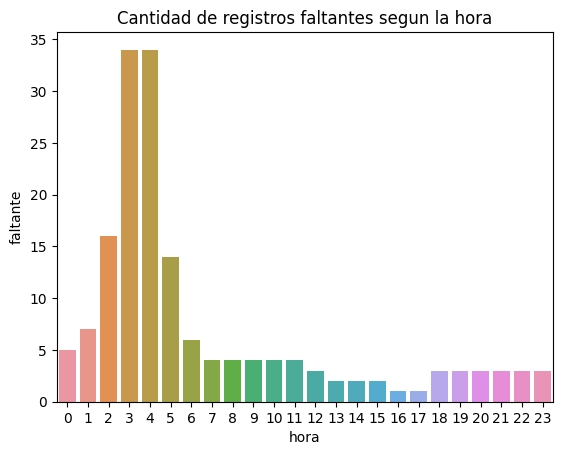

In [18]:
sns.barplot(data=dfqhoras,x="hora",y="faltante").set(title="Cantidad de registros faltantes segun la hora")

entre las 0 horas y las 6 se encuentran la mayor cantidad de faltantes. Suena logico que no se hayan alquilado bicicletas en ese horario

**¿hay dias con pocas horas?**

In [19]:
dias_horas = df.groupby(["dteday"],sort=True)["hr"].count()

In [20]:
dias_horas[dias_horas<24]

dteday
2011-01-02    23
2011-01-03    22
2011-01-04    23
2011-01-05    23
2011-01-06    23
              ..
2012-10-30    11
2012-11-08    23
2012-11-29    23
2012-12-24    23
2012-12-25    23
Name: hr, Length: 76, dtype: int64

Hay 76 dias que le fantan horas. Lo "normal" serian entre 2 o 3 (max 6 horas , teniendo en cuenta que desde las 0 a las 6 hay poco movimiento)  pero en la primera impresión se ve un valor que le faltan 11 horas

In [21]:
for a in range(23):
  print(dias_horas[dias_horas==a])

Series([], Name: hr, dtype: int64)
dteday
2012-10-29    1
Name: hr, dtype: int64
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
dteday
2011-01-27    8
Name: hr, dtype: int64
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
dteday
2012-10-30    11
Name: hr, dtype: int64
dteday
2011-01-18    12
Name: hr, dtype: int64
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
dteday
2011-01-26    16
Name: hr, dtype: int64
dteday
2011-08-28    17
Name: hr, dtype: int64
dteday
2011-02-22    18
2011-08-27    18
Name: hr, dtype: int64
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
dteday
2011-01-03    22
2011-01-11    22
2011-01-12    22
2011-02-11    22
2011-02-28    22
2011-03-10    22
Name: hr, dtype: int64

Dias anomalos:

2012-10-29    1 hora solamente **actualizado: huracan Sandy**

2012-10-30    11 horas solamente **actualizado: huracan Sandy**

2011-01-26    16 horas solamente **actualizado: The Carmageddon Snowstorm**

2011-01-27    8 horas solamente **actualizado: The Carmageddon Snowstorm**

2011-01-18    12 horas solamente **actualizado: The Carmageddon Snowstorm**

2011-08-28    17 horas solamente **actualizado: Huracan Irene**


tomando como "normal" que falten 6 horas en el dia (franja entre las 0 horas a las 6), el resto de los dias se comportarian normalmente

hay dias correlativos: 29 y 30 de octubre 2012 / 26 y 27 de enero 2011

**Ejemplo del dia faltante 29-10-2012: Evaluo los datos del dia anterior y posterior**



In [22]:
df[(df.dteday.isin(["2012-10-29","2012-10-28","2012-10-30"]))]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15859,15860,2012-10-28,4,1,10,0,0,0,0,3,0.52,0.5000,0.68,0.2985,20,97,117
15860,15861,2012-10-28,4,1,10,1,0,0,0,2,0.50,0.4848,0.72,0.2836,22,111,133
15861,15862,2012-10-28,4,1,10,2,0,0,0,2,0.50,0.4848,0.68,0.2985,17,99,116
15862,15863,2012-10-28,4,1,10,3,0,0,0,2,0.50,0.4848,0.63,0.3284,18,61,79
15863,15864,2012-10-28,4,1,10,4,0,0,0,2,0.50,0.4848,0.63,0.3582,1,19,20
15864,15865,2012-10-28,4,1,10,5,0,0,0,2,0.50,0.4848,0.63,0.2985,6,22,28
15865,15866,2012-10-28,4,1,10,6,0,0,0,2,0.50,0.4848,0.59,0.3284,7,32,39
15866,15867,2012-10-28,4,1,10,7,0,0,0,2,0.50,0.4848,0.59,0.2985,17,48,65
15867,15868,2012-10-28,4,1,10,8,0,0,0,2,0.50,0.4848,0.59,0.5522,55,118,173
15868,15869,2012-10-28,4,1,10,9,0,0,0,2,0.50,0.4848,0.55,0.4179,124,206,330


En principio parece ser que el clima no era optimo (weathersit = 3). El dia 29 arranca (0 hs) y el proximo registro es el 30 a las 13 hs. Suponia una tormenta, y **al googlear confirmo que la fecha coincide con el huracan Sandy**

**Conclusión:**

1) El dataset parece estar completo. Las horas que faltan no parecen ser registros faltantes sino horarios en los cual no hubo movimiento. La gente no alquila bicicletas si hay huracan 😲

2) No hay valores nulos

3) No hay registros duplicados



## Modificacion dataset

### Eliminacion Columnas

In [23]:
del df["instant"] #es una columna indice

### Modifcación a columnas numericas a categoricas

In [24]:
df["yr"].unique() # control sobre los valores del año.....0 es 2011 y 1 es 2012

array([0, 1])

In [25]:
# yr lo transformo en categorias
df["yr"] = df["yr"].replace({0: "año 2011", 1: "año 2012"})

In [26]:
df["season"].unique() #las estaciones son: 1 inviero, 2 primavera, 3 verano, 4 otoño

array([1, 2, 3, 4])

In [27]:
df["season"] = df["season"].replace({1:"invierno",2:"primavera",3:"verano",4:"otoño"})

In [28]:
df["holiday"].unique() #feriado o no

array([0, 1])

In [29]:
print("feriados:",df[df["holiday"] ==1]["holiday"].count())
print("dias habiles:",df[df["holiday"] ==0]["holiday"].count())  #1 es ferido 

feriados: 500
dias habiles: 16879


500 registros de feriados / 24 horas / 2 años = 10 feriados por año

es una cuenta simplificada porque estoy suponiendo que los dias feriados tienen 24 horas completas. Es solo para evaluar la razonabilidad del valor

In [30]:
df["holiday"] =df["holiday"].replace({0:"no",1:"si"})

In [31]:
df["workingday"].unique() #si el dia no es fin de semana ni feriado entonces = 1 sino es 0

array([0, 1])

In [32]:
df[df["workingday"]==1]["workingday"].count() #1 = dia laboral

11865

(5 dias laborables a la semana x 4 semanas por mes x 12 meses x 2 años) + 20 (10 feriados por año) x 24 horas

In [33]:
((5*4*12*2)+20)*24

12000

12.000 vs 11.865 razonable como prueba global

In [34]:
df["workingday"] = df["workingday"].replace ({0:"no",1:"si"})

In [35]:
df["weathersit"].unique()

array([1, 2, 3, 4])

Segun la fuente de datos, los valores representan:

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


a fin de simplificar, reemplazo los valores de la siguiente manera:
1 = Excelente
2 = Bueno
3 = Regular
4 = Malo



In [36]:
df["weathersit"] =df["weathersit"].replace ({1:"excelente",2:"bueno",3:"regular",4:"malo"})

In [37]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,invierno,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,invierno,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,invierno,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,invierno,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,invierno,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0,0,1,1


### Agrego columna catcnt

In [38]:
df["catcnt"] = ""
df.loc[df["cnt"] > 0, "catcnt"] = "Entre 1  y 100"
df.loc[df["cnt"] > 100, "catcnt"] = "Entre 100  y 200"
df.loc[df["cnt"] > 200, "catcnt"] = "Entre 200 y 300"
df.loc[df["cnt"] > 300, "catcnt"] = "Mayor a 300" 


In [39]:
df.catcnt.value_counts() #cuenta de las categorias

Entre 1  y 100      7035
Mayor a 300         3891
Entre 100  y 200    3749
Entre 200 y 300     2704
Name: catcnt, dtype: int64

In [40]:
df.catcnt.value_counts(normalize=True)*100

Entre 1  y 100      40.479890
Mayor a 300         22.389090
Entre 100  y 200    21.572012
Entre 200 y 300     15.559008
Name: catcnt, dtype: float64

In [41]:
df.groupby(['catcnt'])["cnt"].sum()/df["cnt"].sum()*100

catcnt
Entre 1  y 100       7.620360
Entre 100  y 200    16.904867
Entre 200 y 300     20.224838
Mayor a 300         55.249935
Name: cnt, dtype: float64

### Agregar dia de la semana (en letras)

In [42]:
df["dia_sem_letra"] = df["weekday"]

df.dia_sem_letra = df.dia_sem_letra.replace({0: "dom", 1: "lun",2:"mar",3:"mie",4:"jue",5:"vie",6:"sab"})

df.head()
df["dia_sem_letra"].unique() #para probar si tomo todos los dias









array(['sab', 'dom', 'lun', 'mar', 'mie', 'jue', 'vie'], dtype=object)

In [43]:
df.head(20)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra
0,2011-01-01,invierno,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0000,3,13,16,Entre 1 y 100,sab
1,2011-01-01,invierno,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0000,8,32,40,Entre 1 y 100,sab
2,2011-01-01,invierno,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0000,5,27,32,Entre 1 y 100,sab
3,2011-01-01,invierno,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0000,3,10,13,Entre 1 y 100,sab
4,2011-01-01,invierno,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0000,0,1,1,Entre 1 y 100,sab
5,2011-01-01,invierno,año 2011,1,5,no,6,no,bueno,0.24,0.2576,0.75,0.0896,0,1,1,Entre 1 y 100,sab
6,2011-01-01,invierno,año 2011,1,6,no,6,no,excelente,0.22,0.2727,0.80,0.0000,2,0,2,Entre 1 y 100,sab
7,2011-01-01,invierno,año 2011,1,7,no,6,no,excelente,0.20,0.2576,0.86,0.0000,1,2,3,Entre 1 y 100,sab
8,2011-01-01,invierno,año 2011,1,8,no,6,no,excelente,0.24,0.2879,0.75,0.0000,1,7,8,Entre 1 y 100,sab
9,2011-01-01,invierno,año 2011,1,9,no,6,no,excelente,0.32,0.3485,0.76,0.0000,8,6,14,Entre 1 y 100,sab


### Temperatura, Sensación Termica y viento

In [44]:
# la temperatura (temp) esta normalizada
#(t-tmin)/(tmax-tmin), tmin=-8, t_max=+39


df["temperatura"] = df["temp"]*47 -8
df.head()
 

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura
0,2011-01-01,invierno,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0,3,13,16,Entre 1 y 100,sab,3.28
1,2011-01-01,invierno,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0,8,32,40,Entre 1 y 100,sab,2.34
2,2011-01-01,invierno,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0,5,27,32,Entre 1 y 100,sab,2.34
3,2011-01-01,invierno,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0,3,10,13,Entre 1 y 100,sab,3.28
4,2011-01-01,invierno,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0,0,1,1,Entre 1 y 100,sab,3.28


In [45]:
# Sensacion terminica normalizada (atemp)
#(t-tmin)/(tmax-tmin), tmin=-16, t_max=+50

df["st"] = df["atemp"] * 66 -16
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura,st
0,2011-01-01,invierno,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0,3,13,16,Entre 1 y 100,sab,3.28,3.0014
1,2011-01-01,invierno,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0,8,32,40,Entre 1 y 100,sab,2.34,1.9982
2,2011-01-01,invierno,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0,5,27,32,Entre 1 y 100,sab,2.34,1.9982
3,2011-01-01,invierno,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0,3,10,13,Entre 1 y 100,sab,3.28,3.0014
4,2011-01-01,invierno,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0,0,1,1,Entre 1 y 100,sab,3.28,3.0014


In [46]:
#viento normalizado en 67
df["viento"] = df["windspeed"]*67
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura,st,viento
0,2011-01-01,invierno,año 2011,1,0,no,6,no,excelente,0.24,...,0.81,0.0,3,13,16,Entre 1 y 100,sab,3.28,3.0014,0.0
1,2011-01-01,invierno,año 2011,1,1,no,6,no,excelente,0.22,...,0.80,0.0,8,32,40,Entre 1 y 100,sab,2.34,1.9982,0.0
2,2011-01-01,invierno,año 2011,1,2,no,6,no,excelente,0.22,...,0.80,0.0,5,27,32,Entre 1 y 100,sab,2.34,1.9982,0.0
3,2011-01-01,invierno,año 2011,1,3,no,6,no,excelente,0.24,...,0.75,0.0,3,10,13,Entre 1 y 100,sab,3.28,3.0014,0.0
4,2011-01-01,invierno,año 2011,1,4,no,6,no,excelente,0.24,...,0.75,0.0,0,1,1,Entre 1 y 100,sab,3.28,3.0014,0.0


# Respuestas y conclusiones

## ¿El alquiler de bicicletas varia segun el día de la semana?

Text(0.5, 0, 'Día de la semana')

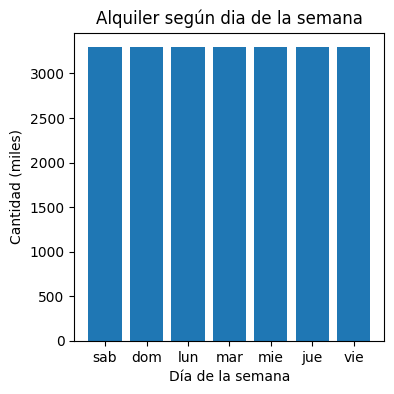

In [47]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["dia_sem_letra"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según dia de la semana")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Día de la semana")



In [48]:
df.groupby("dia_sem_letra")[["cnt"]].sum() #comprobacion de los valores del grafico anterior

,cnt
dia_sem_letra,
dom,444027
jue,485395
lun,455503
mar,469109
mie,473048
sab,477807
vie,487790


**Conclusión: El alquiler de bicicletas es relativamente constante en los distintos dias de la semana**


Igualmente, voy a graficar con seaborn

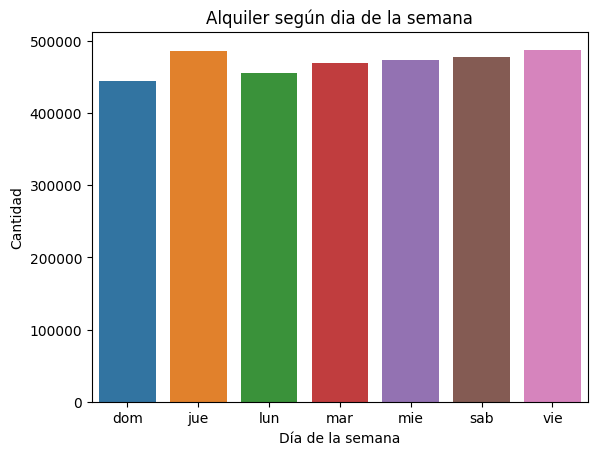

In [49]:
tempo = df.groupby("dia_sem_letra")[["cnt"]].sum().reset_index()
ax = sns.barplot(tempo,x="dia_sem_letra",y="cnt")
ax.set_title("Alquiler según dia de la semana")
ax.set_ylabel ("Cantidad")
ax.set_xlabel ("Día de la semana")
plt.show()


**Aca se ve un poco mas la diferencia de los alquileres en los dias de la semana, pero aun asi, la diferencia no es significativa**

## ¿hay meses de mayor alquiler?

Text(0.5, 0, 'Mes')

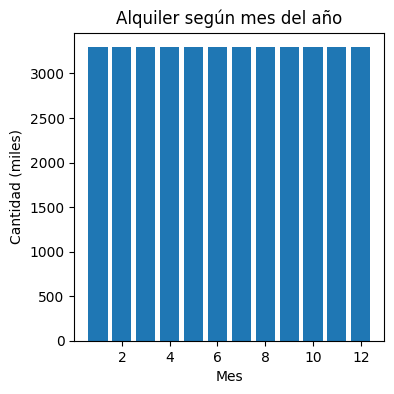

In [50]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["mnth"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según mes del año")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Mes")

Hago la comprobación en tabla

In [51]:
df.groupby("mnth")[["cnt"]].sum()

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


hay diferencias......grafico con seaborn

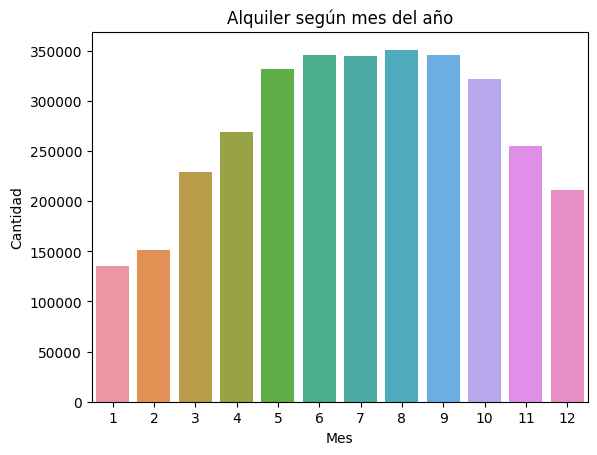

In [52]:
tempo = df.groupby("mnth")[["cnt"]].sum().reset_index()
ax = sns.barplot(tempo,x="mnth",y="cnt")
ax.set_title("Alquiler según mes del año")
ax.set_ylabel ("Cantidad")
ax.set_xlabel ("Mes")
plt.show()

como estan distribuidos los temporadas segun los meses?

In [53]:
for a in range(1,13):
  print(df.loc[df["mnth"]==a,['season','mnth']].head(1))

     season  mnth
0  invierno     1
       season  mnth
688  invierno     2
        season  mnth
1337  invierno     3
         season  mnth
2067  primavera     4
         season  mnth
2786  primavera     5
         season  mnth
3530  primavera     6
      season  mnth
4250  verano     7
      season  mnth
4994  verano     8
      season  mnth
5725  verano     9
     season  mnth
6442  otoño    10
     season  mnth
7185  otoño    11
     season  mnth
7904  otoño    12


**conclusión: Hay variacion significativa respecto a los meses. En invierno esta la menor actividad, creciendo hasta el verano y en otoño vuelve a bajar**

## ¿como se comportó el 2011 vs 2012?

Text(0.5, 0, 'Año')

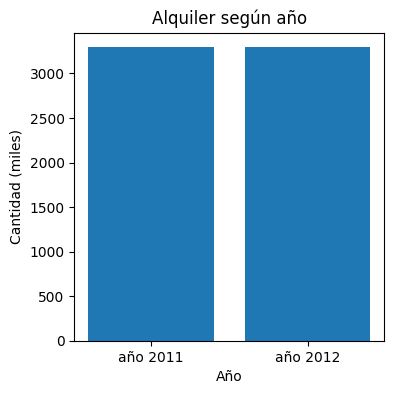

In [54]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["yr"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según año")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Año")

ya no confio en estos graficos....voy por seaborn

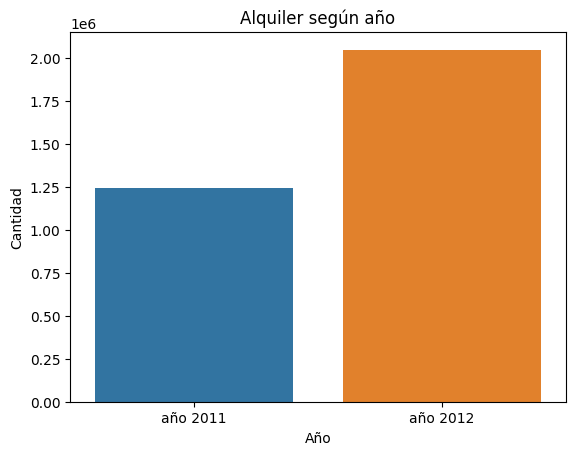

In [219]:
tempo = df.groupby("yr")[["cnt"]].sum().reset_index()
tempo
ax = sns.barplot(tempo,x="yr",y= "cnt")
ax.set_title("Alquiler según año")
ax.set_ylabel ("Cantidad")
ax.set_xlabel ("Año")
plt.show()


**Conclusión: Hay variación significativa respecto al año**

## ¿como se comportan el alquiler con las estaciones del año?

Text(0.5, 0, 'Estación')

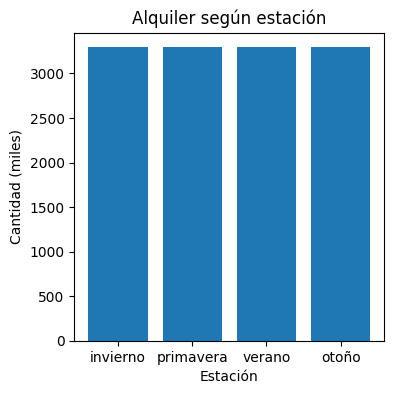

In [55]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["season"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según estación")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Estación")

este grafico no condice con los meses. Voy por seaborn

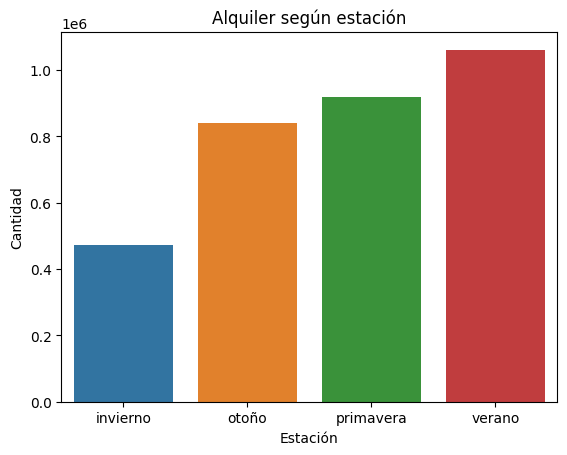

In [223]:
tempo = df.groupby("season")[["cnt"]].sum().reset_index()
ax = sns.barplot(tempo,x="season",y="cnt")
ax.set_title("Alquiler según estación")
ax.set_ylabel ("Cantidad")
ax.set_xlabel ("Estación")
plt.show()

**conclusión: Hay variación significativa según la estación**

## Como se comporta los alquileres a lo largo de los 2 años 

In [226]:
df["dteday"]= pd.to_datetime(df["dteday"])


<ipython-input-231-18f81bc699ec>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


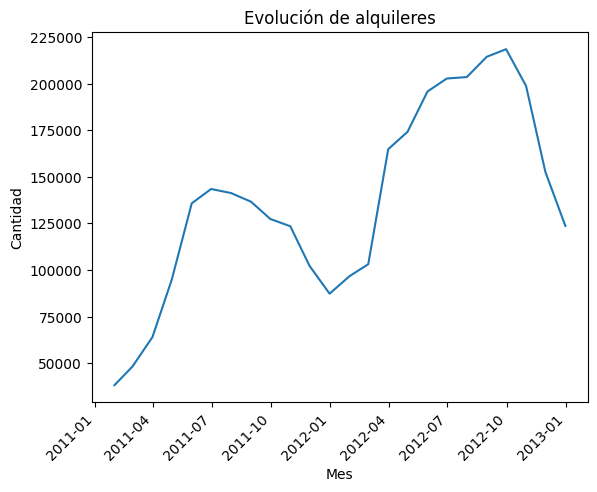

In [231]:
tempo = df.groupby(pd.Grouper(key="dteday",freq = 'M'))[["cnt"]].sum().reset_index()
ax = sns.lineplot(tempo,x='dteday',y='cnt')
ax.set_title("Evolución de alquileres")
ax.set_ylabel ("Cantidad")
ax.set_xlabel ("Mes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

## ¿El alquiler varia segun la sensación termica y la temperatura ?




Text(0, 0.5, 'Cantidad')

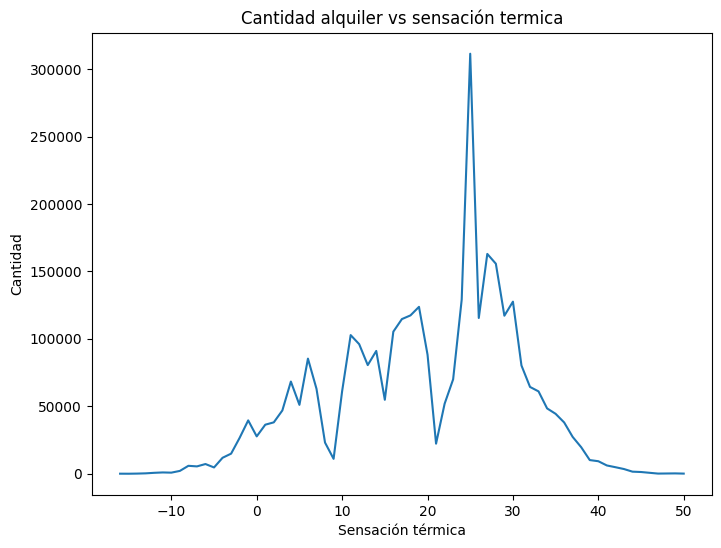

In [56]:
datos= df.groupby("st")[["cnt"]].sum()
fig, ax = plt.subplots(figsize = (8,6))
ax.plot (datos.index,datos["cnt"])
ax.set_title("Cantidad alquiler vs sensación termica")
ax.set_xlabel("Sensación térmica")
ax.set_ylabel("Cantidad")

[Text(0.5, 1.0, 'Dispersión Cantidad vs sensación termica')]

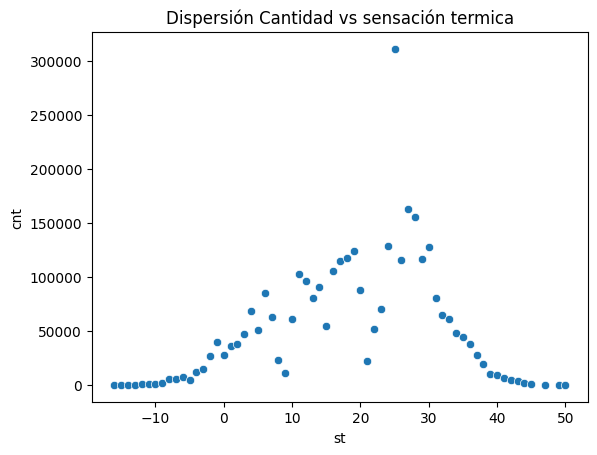

In [57]:
sns.scatterplot(data = datos,x="st",y="cnt").set(title = "Dispersión Cantidad vs sensación termica")

Text(0, 0.5, 'Cantidad')

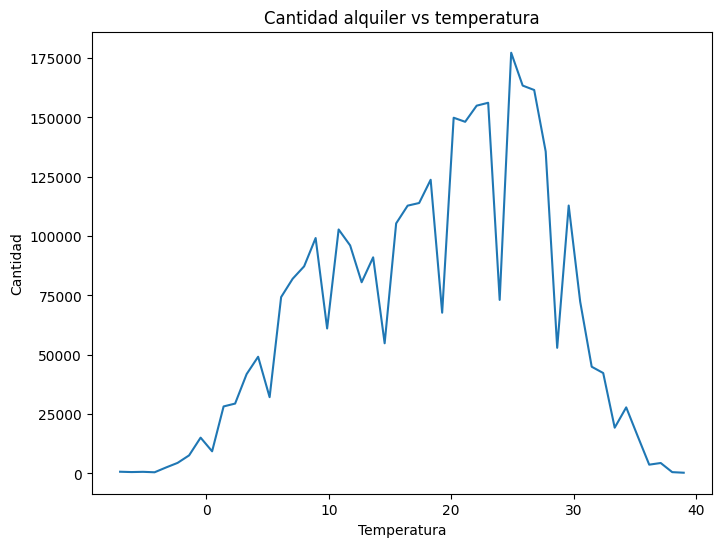

In [58]:
# Igual pero con temperatura
datos= df.groupby("temperatura")[["cnt"]].sum()
fig, ax = plt.subplots(figsize = (8,6))
ax.plot (datos.index,datos["cnt"])
ax.set_title("Cantidad alquiler vs temperatura")
ax.set_xlabel("Temperatura")
ax.set_ylabel("Cantidad")

[Text(0.5, 1.0, 'Dispersión Cantidad vs temperatura. Datos agrupados'),
 Text(0.5, 0, 'cantidad alquilada')]

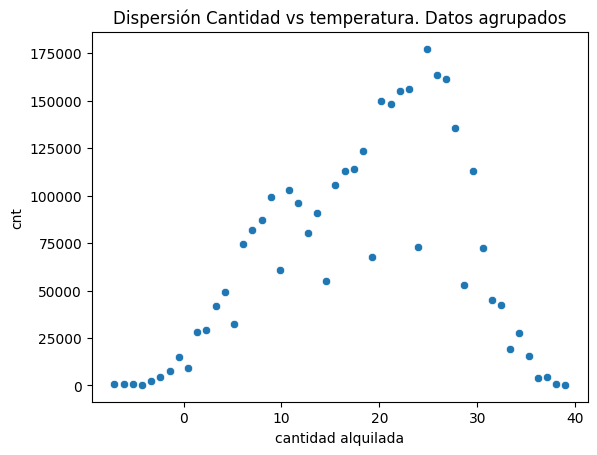

In [59]:
sns.scatterplot(data = datos,x="temperatura",y="cnt").set(title = "Dispersión Cantidad vs temperatura. Datos agrupados",xlabel="cantidad alquilada")


[Text(0.5, 1.0, 'Dispersión Cantidad vs temperatura'),
 Text(0.5, 0, 'cantidad alquilada')]

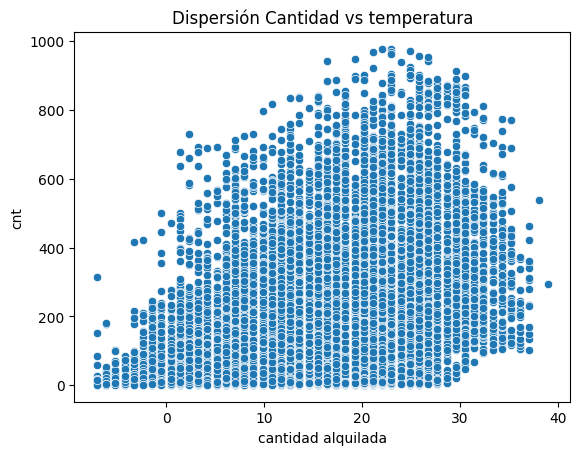

In [60]:
sns.scatterplot(data= df,x="temperatura",y="cnt").set(title = "Dispersión Cantidad vs temperatura",xlabel="cantidad alquilada")

**Conclusión: a mas temperatura / sensación termica, en principio se nota un ascenso en las cantidades alquiladas, pero en ambos casos hay picos hacia arriba y hacia abajo.**
**Luego la curva decrece**




## el viento, ¿afecta a la cantidad alquilada?



Text(0.5, 0, 'Viento')

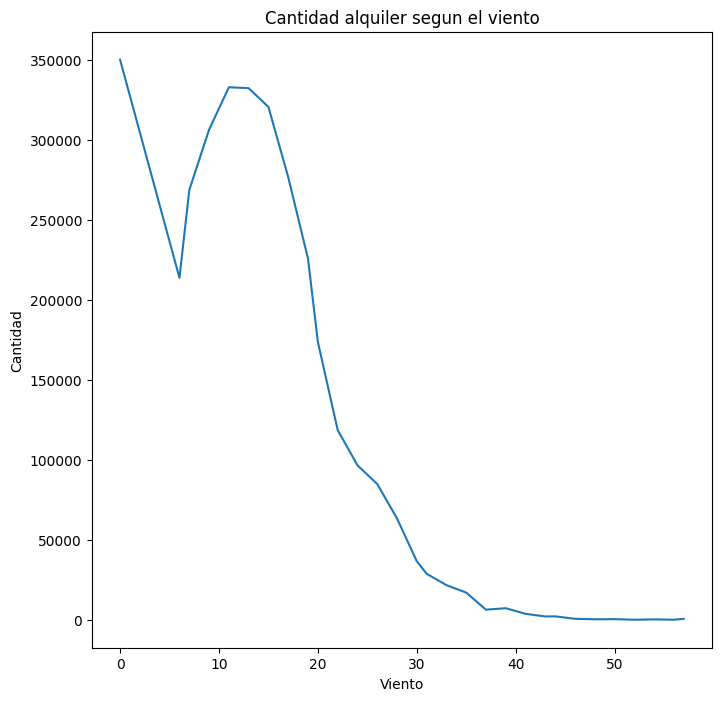

In [61]:
datos= df.groupby("viento")[["cnt"]].sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(datos.index,datos["cnt"])
ax.set_title ("Cantidad alquiler segun el viento")
ax.set_ylabel("Cantidad")
ax.set_xlabel ("Viento")

[Text(0.5, 1.0, 'Dispersión Cantidad vs viento'),
 Text(0.5, 0, 'cantidad alquilada')]

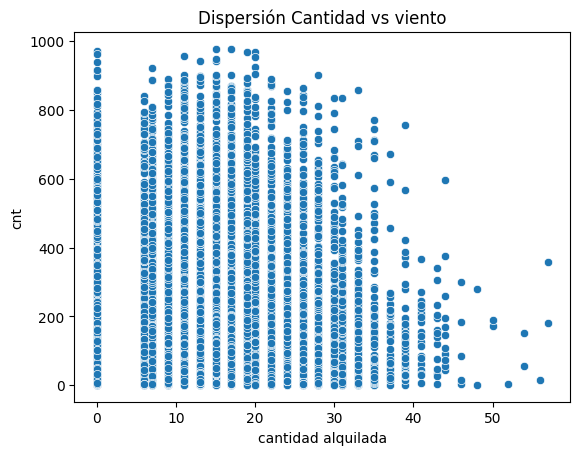

In [62]:
sns.scatterplot(data= df,x="viento",y="cnt").set(title = "Dispersión Cantidad vs viento",xlabel="cantidad alquilada")

[Text(0.5, 1.0, 'Dispersión Cantidad vs viento. Datos agrupados'),
 Text(0.5, 0, 'cantidad alquilada')]

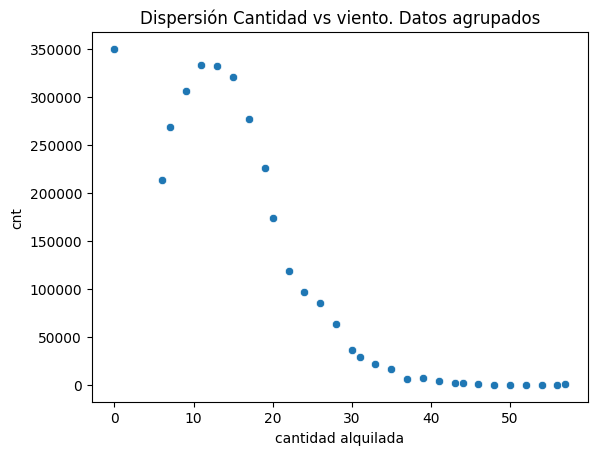

In [63]:
sns.scatterplot(data= datos,x="viento",y="cnt").set(title = "Dispersión Cantidad vs viento. Datos agrupados",xlabel="cantidad alquilada")

**Conclusión: a mas viento menos alquiler. Hay un comportamiento raro en los primeros valores del viento**

## ¿y según la humedad?

Text(0.5, 0, 'Humedad')

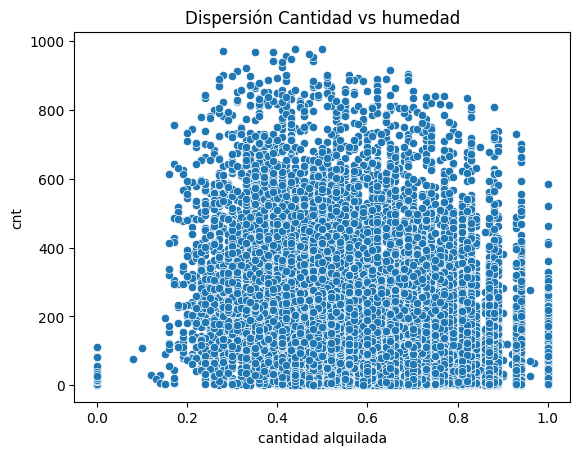

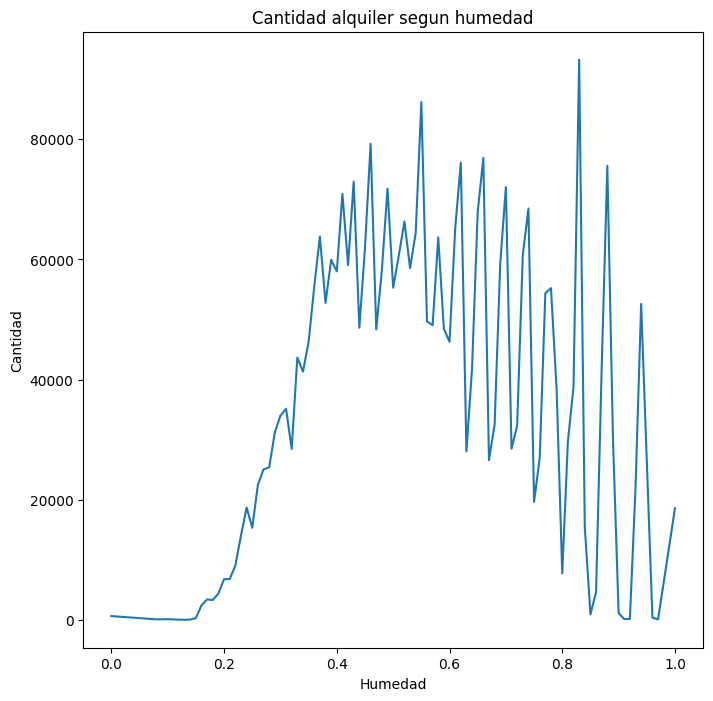

In [64]:
sns.scatterplot(data= df,x="hum",y="cnt").set(title = "Dispersión Cantidad vs humedad",xlabel="cantidad alquilada")
datos= df.groupby("hum")[["cnt"]].sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(datos.index,datos["cnt"])
ax.set_title ("Cantidad alquiler segun humedad")
ax.set_ylabel("Cantidad")
ax.set_xlabel ("Humedad")

**Conclusión: El campo humedad está normalizado (dividido en 100). Se ve un incremento de alquiler a mas humedad y luego desciende con picos importantes en los valores**

## ¿Hay horas picos en el alquier?



<function matplotlib.pyplot.show(close=None, block=None)>

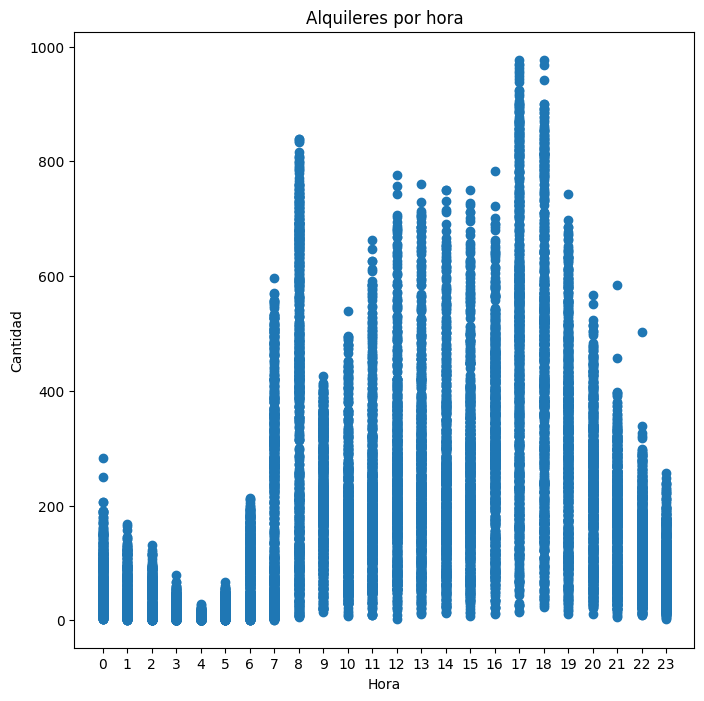

In [65]:
from matplotlib.ticker import MultipleLocator
fig,ax = plt.subplots(figsize = (8,8))
ax.scatter(df["hr"],df["cnt"])
ax.set_title("Alquileres por hora")
ax.set_xlabel ("Hora")
ax.set_ylabel ("Cantidad")
#plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xticks(range(0,24,1))
plt.show

Como se menciono al inicio, entre las 0 horas y las 6 se registran los valores mas bajos

**Comportamiento segun el dia (horas vs cantidad)**
siguiendo la idea del grafico anterior, se evalua por dia.

se observan comportamientos parecidos:

*   sabados y domingos
*   luns a viernes



<function matplotlib.pyplot.show(close=None, block=None)>

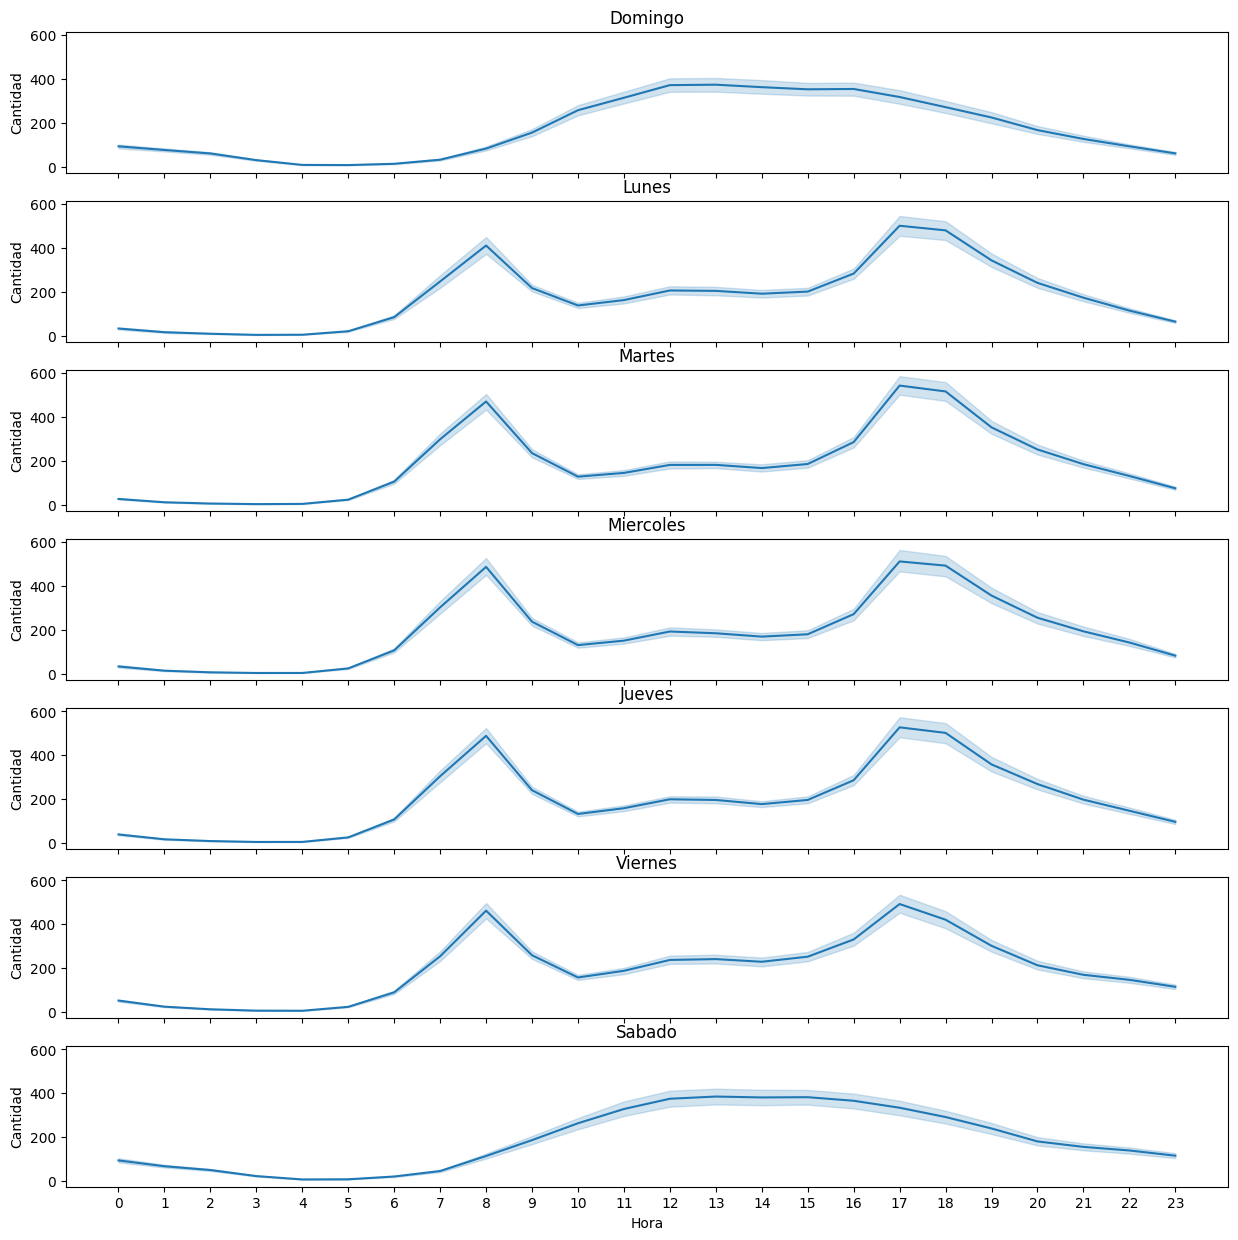

In [66]:
fig, axes = plt.subplots(7, 1, figsize=(15, 15), sharey=True,sharex=True)
sns.lineplot(ax= axes[0], data = df[df["weekday"]==0], y="cnt",x="hr").set(title = "Domingo",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[1], data = df[df["weekday"]==1], y="cnt",x="hr").set(title = "Lunes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[2], data = df[df["weekday"]==2], y="cnt",x="hr").set(title = "Martes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[3], data = df[df["weekday"]==3], y="cnt",x="hr").set(title = "Miercoles",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[4], data = df[df["weekday"]==4], y="cnt",x="hr").set(title = "Jueves",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[5], data = df[df["weekday"]==5], y="cnt",x="hr").set(title = "Viernes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[6], data = df[df["weekday"]==6], y="cnt",x="hr").set(title = "Sabado",xlabel="Hora",ylabel="Cantidad")

#ax[0].grid(axis='both')
#ax[1].grid(axis='both')

plt.xticks(range(0,24,1))

plt.show

**Dias de semana vs fin de semana (horas vs cantidad)**

en la semana los picos se dan a las 8 y las 17 (supongo entrada/salida trabajo)

en el fin de semana hay un consumo mas achatado con valores maximos entre las 12 y las 16

In [67]:

lun_a_sab = df[df["weekday"] >0]
lun_a_vie = lun_a_sab[lun_a_sab["weekday"]<6]  
dom = df[df["dia_sem_letra"] =="dom"]
sab= df[df["dia_sem_letra"] =="sab"]
sab_y_dom = pd.concat([dom,sab])



<function matplotlib.pyplot.show(close=None, block=None)>

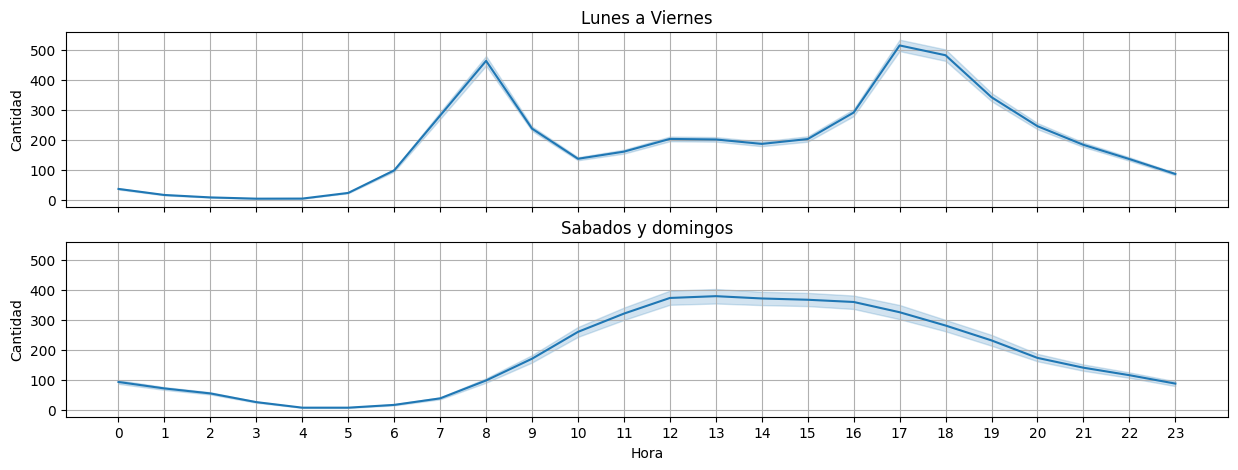

In [68]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharey=True,sharex=True)
sns.lineplot(ax= axes[0], data = lun_a_vie, y="cnt",x="hr").set(xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[1], data = sab_y_dom, y="cnt",x="hr").set(xlabel="Hora",ylabel="Cantidad")

axes[0].grid(axis='both')
axes[1].grid(axis='both')
axes[0].set_title("Lunes a Viernes")
axes[1].set_title("Sabados y domingos")



plt.xticks(range(0,24,1))
plt.show

**Conclusión: hay diferentes horas picos según si es dia de la semana o no. De 0 a 6 son los horarios de menor alquiler**

## ¿hay relacion entre la Temperatura  - sensacion termica vs weathersit	(categorias de clima)?



[Text(0.5, 1.0, 'Categoria clima vs sensacion termica'),
 Text(0, 0.5, 'Sensación termica')]

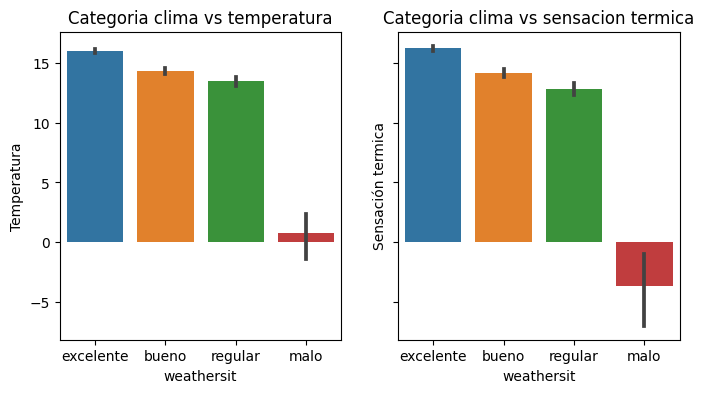

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True,sharex=True)
sns.barplot(ax =axes[0] , x="weathersit",y="temperatura",data=df).set(title = "Categoria clima vs temperatura",ylabel="Temperatura")
sns.barplot(ax =axes[1] , x="weathersit",y="st",data=df).set(title = "Categoria clima vs sensacion termica",ylabel="Sensación termica")

[Text(0.5, 1.0, 'Cat clima vs sensacion termica')]

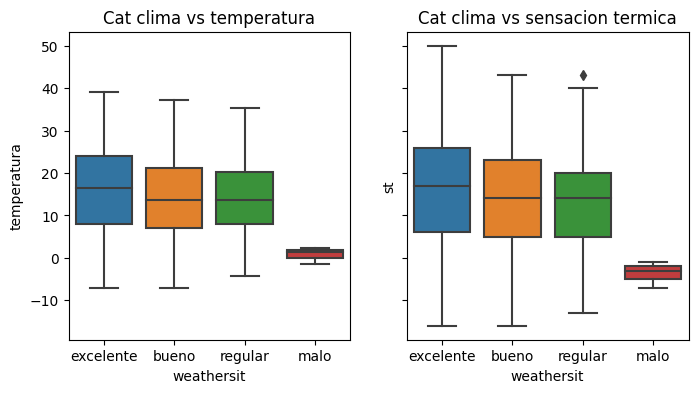

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True,sharex=True)
sns.boxplot(x="weathersit",y="temperatura",data=df,ax = axes[0]).set(title = "Cat clima vs temperatura")

sns.boxplot(x="weathersit",y="st",data=df,ax = axes[1]).set(title = "Cat clima vs sensacion termica")

A mejor categoria de clima, mayor temperatura y sensación termica.

Los valores parecen tener una correcta distribución


## ¿y clima vs viento?

[Text(0.5, 1.0, 'Viento vs clima'),
 Text(0.5, 0, 'Clima'),
 Text(0, 0.5, 'Viento')]

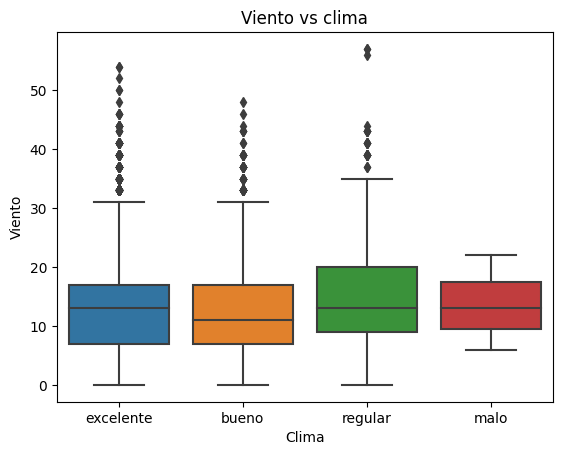

In [71]:
sns.boxplot(x="weathersit",y="viento",data=df).set(title = "Viento vs clima",xlabel = "Clima",ylabel="Viento")

## ¿como afecta el climan general (weathersit) a la cantidad alquilada?


[Text(0.5, 0, 'Clima'), Text(0, 0.5, 'Cantidad')]

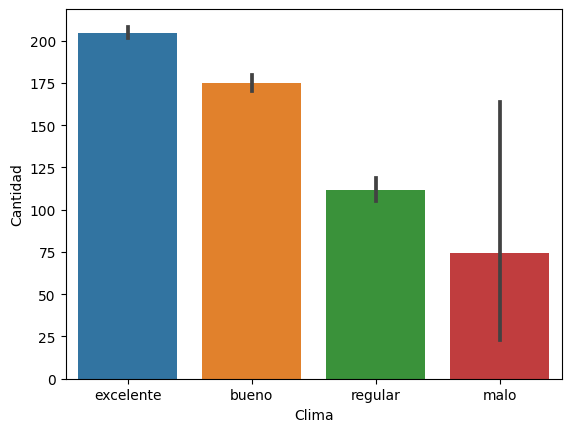

In [72]:
sns.barplot(data=df,x="weathersit",y="cnt").set(xlabel= "Clima",ylabel="Cantidad")


In [73]:
df.groupby("weathersit")["cnt"].sum() 

weathersit
bueno         795952
excelente    2338173
malo             223
regular       158331
Name: cnt, dtype: int64

In [74]:
df.groupby(['weathersit','catcnt'])["cnt"].count() #prueba por categoria

weathersit  catcnt          
bueno       Entre 1  y 100      1891
            Entre 100  y 200    1051
            Entre 200 y 300      739
            Mayor a 300          863
excelente   Entre 1  y 100      4252
            Entre 100  y 200    2419
            Entre 200 y 300     1843
            Mayor a 300         2899
malo        Entre 1  y 100         2
            Entre 100  y 200       1
regular     Entre 1  y 100       890
            Entre 100  y 200     278
            Entre 200 y 300      122
            Mayor a 300          129
Name: cnt, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'Entre 1  y 100'),
  Text(1, 0, 'Entre 100  y 200'),
  Text(2, 0, 'Entre 200 y 300'),
  Text(3, 0, 'Mayor a 300')])

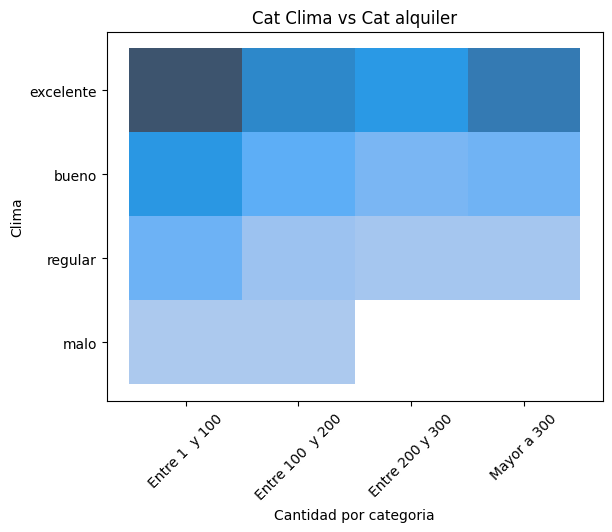

In [75]:
sns.histplot(data=df,x="catcnt",y="weathersit").set(title="Cat Clima vs Cat alquiler",xlabel = "Cantidad por categoria",ylabel="Clima")
plt.xticks(rotation=45)

**Conclusión:**
**La cantidad alquilada esta claramente afectada por el clima (weathersit).** 

**La temperatura y sensacion termica tambien tienen una relación directa con el clima pero no es tan clara al verlo vs la cantidad alquilada**




# Recomendaciones

Del analisis exploratorio se puede concluir que la cantidad de bicicletas depende de los horarios (según el dia de la semana) y el clima. Mientras el clima sea "bueno", los horarios nocturnos son los mejores para retirar bicicletas para reparación (menor demanda), y se deberen reforzar las cantidades disponibles los dias laborales, en los horarios de inicio y finalizacion de la jornada laboral. 
En epocas de tornado / tormenta de nieve no hay alquiler siendo el mejor momento para reparar la mayor cantidad de bicicletas.

# Modelos predictivos

## 1) Regresión Lineal            (en un futuro se agregaran mas modelos de acuerdo al avance de la cursada)


Para la regresión lineal conviene que los campos sean numéricos. Anteriormente se han transformado muchas de las variables a categoricas(en caso que la regresión lineal y polinomica no trabajen en estos datos se optara por un modelo de categorización).

Por este motivo, y solo para evaluar los modelos continuos, se vuelven a cargar los datos originales como df2

In [76]:
df2 = pd.read_csv ("Bicicletas por hora.csv",sep = ",")

### Segun clima y horas

In [77]:
X = df2[["weathersit","hr"]]
y = df2.cnt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = .2,random_state = 1)
X_train

,weathersit,hr
9088,1,14
1292,1,0
13559,1,4
4145,1,15
15913,2,18
...,...,...
10955,1,15
17289,1,6
5192,1,6
12172,1,9


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error

lr = LinearRegression ()
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

print("R2", r2_score(y_test,y_pred))
print("mae", mean_absolute_error(y_test,y_pred))
print("mse", mean_squared_error(y_test,y_pred))
print("rmse", (mean_squared_error(y_test,y_pred))**(1/2))


R2 0.18252899711255766
mae 123.76044274410856
mse 27272.400134816795
rmse 165.14357430677342


### Según componentes del clima y horas

In [79]:
X = df2[["temp","atemp","hum","windspeed","hr"]]
y = df2.cnt


X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = .2,random_state = 1)

In [80]:
lr = LinearRegression ()
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

print("R2", r2_score(y_test,y_pred))
print("mae", mean_absolute_error(y_test,y_pred))
print("mse", mean_squared_error(y_test,y_pred))
print("rmse", (mean_squared_error(y_test,y_pred))**(1/2))

R2 0.33299128911724674
mae 109.19924209368044
mse 22252.6895661735
rmse 149.17335407563075


### Segun compomentes del clima, hora, dia de la semana y dia laboral

In [81]:
X = df2[["temp","atemp","hum","windspeed","hr","weekday","workingday"]]
y = df2.cnt


X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = .2,random_state = 1)

In [82]:
lr = LinearRegression ()
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

print("R2", r2_score(y_test,y_pred))
print("mae", mean_absolute_error(y_test,y_pred))
print("mse", mean_squared_error(y_test,y_pred))
print("rmse", (mean_squared_error(y_test,y_pred))**(1/2))

R2 0.33341955061873063
mae 109.3325667959492
mse 22238.401941304175
rmse 149.1254570531275


### Todas las variables

In [83]:
X = df2[["temp","atemp","hum","windspeed","hr","weekday","workingday","holiday","season","weathersit"]]
y = df2.cnt


X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = .2,random_state = 1)

In [84]:
lr = LinearRegression ()
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

print("R2", r2_score(y_test,y_pred))
print("mae", mean_absolute_error(y_test,y_pred))
print("mse", mean_squared_error(y_test,y_pred))
print("rmse", (mean_squared_error(y_test,y_pred))**(1/2))

R2 0.3449788305559731
mae 108.7566381499657
mse 21852.762197991782
rmse 147.82679796975845


de todas las opciones, esta tiene el R2 mas alto y el mae, mse y rmse mas bajo. 

### Evaluando overfittin / underfitting


In [85]:
y_pred_train = lr.predict(X_train)

print('R2_train', r2_score(y_train, y_pred_train))
print('mae_train', mean_absolute_error(y_train, y_pred_train))
print('mse_train', mean_squared_error(y_train, y_pred_train))
print('rmse_train', (mean_squared_error(y_train, y_pred_train))**(1/2))

R2_train 0.33789415322487226
mae_train 108.14457176745839
mse_train 21705.86266891671
rmse_train 147.32909647763645


### Conclusión

Como el objetivo es precedir la cantidad de alquileres, lo optimo es hacer una regresión

En todos los casos, el R2 es muy bajo, por lo que entiendo que la regresión lineal no es adecuada para este dataset

al agregar todas las variables se obtuvo el menor error, pero el rmse da un desvio promedio de 147 alquileres, cuando el promedio de los alquileres es de 189.

Al aplicar el modelo sobre los datos de entrenamiento el resultado fue aun peor. Concluyo entonces, que hay underfitting

**No es un modelo eficiente de predicción**

# Mejoras en limpieza de datos



en primer lugar, voy a duplicar el dataframe

In [86]:
df_copia = df.copy()


In [87]:
#voy a traer las variables numericas
numeric_data = df_copia.select_dtypes(include =np.number)
numeric_data.head()

,mnth,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,temperatura,st,viento
0,1,0,6,0.24,0.2879,0.81,0.0,3,13,16,3.28,3.0014,0.0
1,1,1,6,0.22,0.2727,0.80,0.0,8,32,40,2.34,1.9982,0.0
2,1,2,6,0.22,0.2727,0.80,0.0,5,27,32,2.34,1.9982,0.0
3,1,3,6,0.24,0.2879,0.75,0.0,3,10,13,3.28,3.0014,0.0
4,1,4,6,0.24,0.2879,0.75,0.0,0,1,1,3.28,3.0014,0.0


In [88]:
#de estas variables, no me interesa analizar mnth, hr, weekday, temp (porque ya tengo el dato sin normalizar), atemp (idem), windspeed(idem)

numeric_data = numeric_data.drop(["mnth","hr","weekday","temp","atemp","windspeed"],axis = 1)

In [89]:
numeric_data.head()

,hum,casual,registered,cnt,temperatura,st,viento
0,0.81,3,13,16,3.28,3.0014,0.0
1,0.80,8,32,40,2.34,1.9982,0.0
2,0.80,5,27,32,2.34,1.9982,0.0
3,0.75,3,10,13,3.28,3.0014,0.0
4,0.75,0,1,1,3.28,3.0014,0.0


In [90]:
print(numeric_data.corr())

                  hum    casual  registered       cnt  temperatura        st  \
hum          1.000000 -0.347028   -0.273933 -0.322911    -0.069881 -0.051918   
casual      -0.347028  1.000000    0.506618  0.694564     0.459616  0.454080   
registered  -0.273933  0.506618    1.000000  0.972151     0.335361  0.332559   
cnt         -0.322911  0.694564    0.972151  1.000000     0.404772  0.400929   
temperatura -0.069881  0.459616    0.335361  0.404772     1.000000  0.987672   
st          -0.051918  0.454080    0.332559  0.400929     0.987672  1.000000   
viento      -0.290105  0.090287    0.082321  0.093234    -0.023125 -0.062336   

               viento  
hum         -0.290105  
casual       0.090287  
registered   0.082321  
cnt          0.093234  
temperatura -0.023125  
st          -0.062336  
viento       1.000000  


**Conclusión: hay una correlación fuerte entre la temperatura y la sensación termica**


# OUTLIERS / ANALISIS UNIVARIADO

## Humedad


antes de elimiar outliers voy a analizar rapidamente la variable

In [91]:
numeric_data.hum.describe()


count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

la desviación estandar es relativamente cercana a la media



In [92]:
v = numeric_data.hum
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
0.88,657,3.780425,3.780425
0.83,630,3.625065,7.405489
0.94,560,3.222280,10.627769
0.87,488,2.807987,13.435756
0.70,430,2.474251,15.910006
0.66,388,2.232580,18.142586
0.65,387,2.226825,20.369411
0.69,359,2.065711,22.435123
0.55,352,2.025433,24.460556
0.74,341,1.962138,26.422694


In [93]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                22
Porcentaje              22
Porcentaje acumulado    22
dtype: int64

In [94]:
tabla.count()

Cantidad                89
Porcentaje              89
Porcentaje acumulado    89
dtype: int64

La variable Humedad tiene 89 valores unicos. 22 de esos valores representan la mitad de los valores mas frecuentes, siendo 0.88 el valor que mas veces se repite

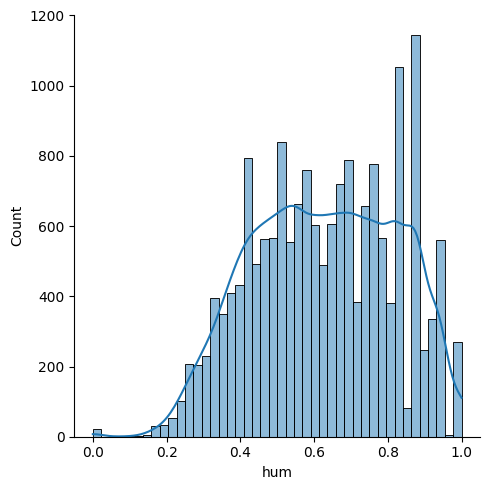

In [95]:

sns.displot(numeric_data['hum'], kde = True) #kde es para la linea

In [96]:
# en principio parece una curva normal. 
# calculo de la skew y kurtosis
from scipy.stats import skew, kurtosis
skew(numeric_data['hum'])

-0.1112775438226877

el valor esperado del skew es 0 (limites -.5 y .5), por eso la humedad cumple con el valor esperado

In [97]:
kurtosis(numeric_data['hum'],fisher = False )

2.1737756972710045

si fuera normal se espera un kurtosis de 3 (limite 2 y 4), recordar poner parametro fisher = False para que no reste al resultado 3

<Axes: >

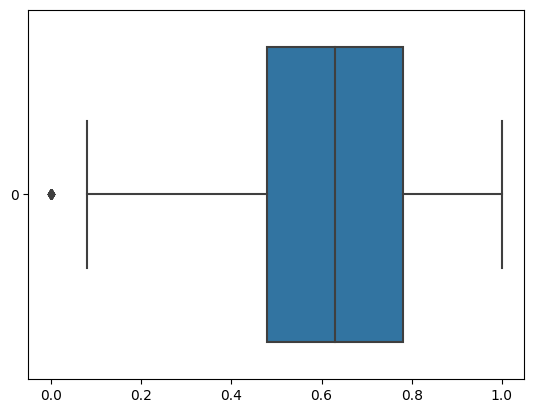

In [98]:
#como es una curva normal, voy a usar z_score. Igual voy a graficar el boxplot 

sns.boxplot(numeric_data['hum'],orient = 'h')

In [99]:
from scipy import stats
z_score = np.abs(stats.zscore(numeric_data['hum']))

In [100]:
columna_z_score_humedad = numeric_data['hum'][z_score <2] #limite
columna_z_score_humedad.describe()


count    17129.000000
mean         0.633565
std          0.186842
min          0.250000
25%          0.480000
50%          0.640000
75%          0.790000
max          1.000000
Name: hum, dtype: float64

In [101]:
limite_minimo_humedad = columna_z_score_humedad.min()
limite_maximo_humedad = columna_z_score_humedad.max()
limite_minimo_humedad,limite_maximo_humedad

(0.25, 1.0)

In [102]:

df_copia[df_copia['hum'] <0.25]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura,st,viento
468,2011-01-21,invierno,año 2011,1,13,no,5,si,excelente,0.20,...,0.21,0.5821,8,65,73,Entre 1 y 100,vie,1.40,-6.0010,39.0007
936,2011-02-11,invierno,año 2011,2,15,no,5,si,excelente,0.32,...,0.21,0.1642,12,62,74,Entre 1 y 100,vie,7.04,5.0012,11.0014
938,2011-02-11,invierno,año 2011,2,17,no,5,si,excelente,0.30,...,0.24,0.0000,18,193,211,Entre 200 y 300,vie,6.10,5.9978,0.0000
1003,2011-02-14,invierno,año 2011,2,11,no,1,si,excelente,0.52,...,0.23,0.2537,10,43,53,Entre 1 y 100,lun,16.44,17.0000,16.9979
1004,2011-02-14,invierno,año 2011,2,12,no,1,si,excelente,0.56,...,0.22,0.4478,27,99,126,Entre 100 y 200,lun,18.32,18.9998,30.0026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,2012-11-08,otoño,año 2012,11,14,no,4,si,excelente,0.44,...,0.18,0.4179,33,149,182,Entre 100 y 200,jue,12.68,13.0004,27.9993
16101,2012-11-08,otoño,año 2012,11,15,no,4,si,excelente,0.44,...,0.18,0.4179,32,201,233,Entre 200 y 300,jue,12.68,13.0004,27.9993
16102,2012-11-08,otoño,año 2012,11,16,no,4,si,excelente,0.42,...,0.16,0.3881,18,321,339,Mayor a 300,jue,11.74,11.9972,26.0027
16103,2012-11-08,otoño,año 2012,11,17,no,4,si,excelente,0.40,...,0.20,0.2985,36,556,592,Mayor a 300,jue,10.80,11.0006,19.9995


los outliers representan 250 registros

## Temperatura

In [103]:
numeric_data.temperatura.describe()

count    17379.000000
mean        15.358397
std          9.050138
min         -7.060000
25%          7.980000
50%         15.500000
75%         23.020000
max         39.000000
Name: temperatura, dtype: float64

en primer lugar no se ven datos extraños. La temperatura (celcius) esta entre -7 y como maximo 39. 

La temperaturas promedio que registra washinton (supongiendo que los datos son de ahi) estan entre los 0 y 31 grados. Considero que los valores son aceptables.

la desviación estandar en este caso es mas lejana a la media (aunque tambien la amplitud entre el maximo y el minimo)

In [104]:
v = numeric_data.temperatura
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
21.14,726,4.177456,4.177456
23.02,693,3.987571,8.165027
22.08,692,3.981817,12.146844
24.90,690,3.970309,16.117153
20.20,675,3.883998,20.001151
8.92,671,3.860982,23.862132
7.98,645,3.711376,27.573508
6.10,641,3.688360,31.261868
10.80,614,3.533000,34.794867
7.04,611,3.515737,38.310605


In [105]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                13
Porcentaje              13
Porcentaje acumulado    13
dtype: int64

In [106]:
tabla.count()

Cantidad                50
Porcentaje              50
Porcentaje acumulado    50
dtype: int64

La variable Temperatura tiene 50 valores unicos. 13 de esos valores representan la mitad de los valores mas frecuentes, siendo 21.14 el valor que mas veces se repite

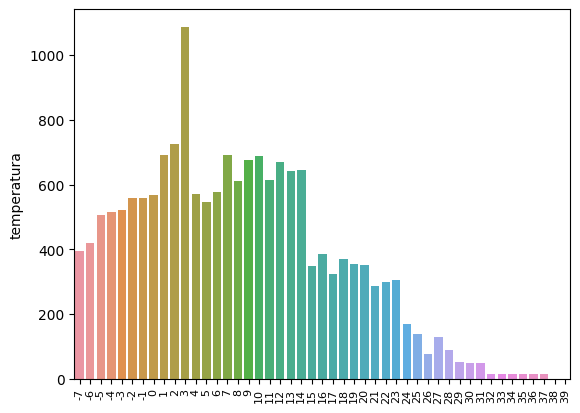

<Figure size 5000x5000 with 0 Axes>

In [107]:
prueba = round(numeric_data.temperatura,0).astype(int)
sns.barplot(x= prueba.unique(),y=prueba.value_counts())
plt.xticks(rotation=90, fontsize = 8)
plt.figure(figsize = (50,50))
plt.show()

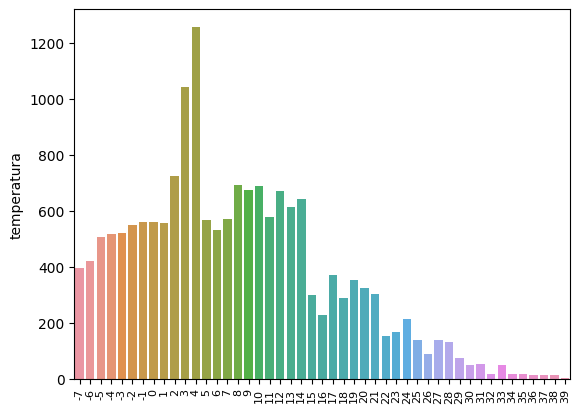

<Figure size 5000x5000 with 0 Axes>

In [108]:
import math
prueba2 = numeric_data.temperatura
prueba2 = prueba2.apply(lambda x: math.ceil(x))
sns.barplot(x= prueba2.unique(),y=prueba2.value_counts())
plt.xticks(rotation=90, fontsize = 8)
plt.figure(figsize = (50,50))
plt.show()

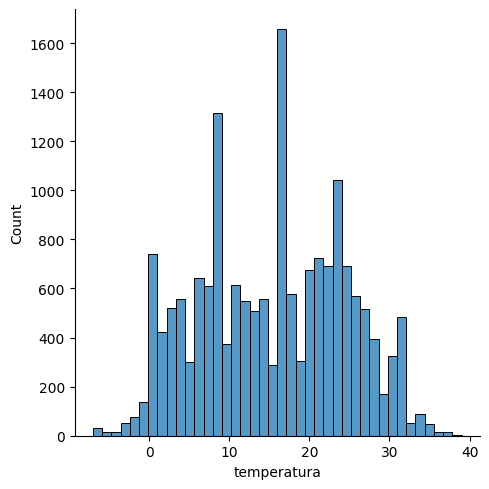

In [109]:
sns.displot(prueba)

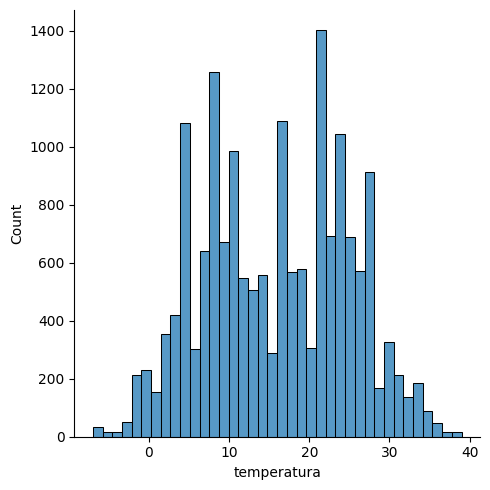

In [110]:
sns.displot(prueba2)

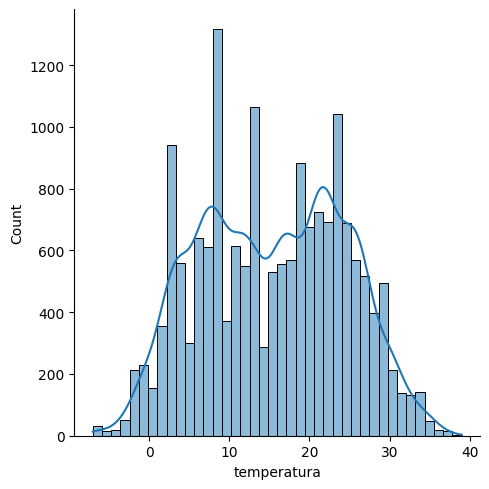

In [111]:
sns.displot(numeric_data['temperatura'], kde = True) #kde es para la linea

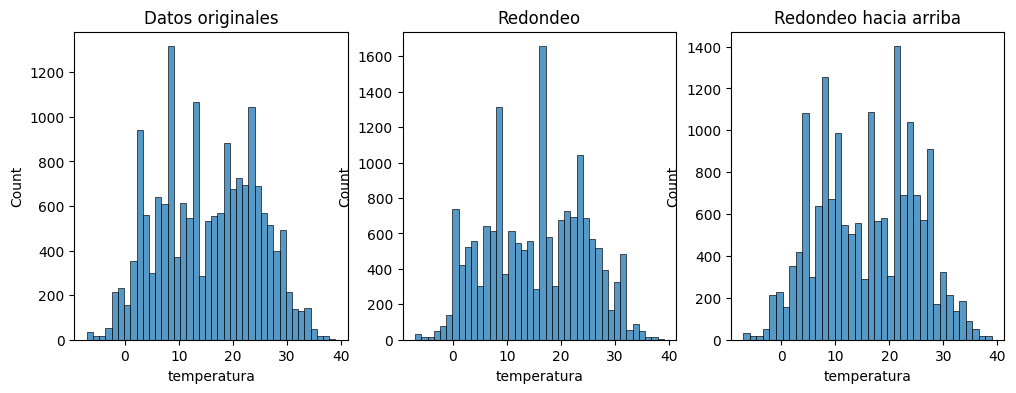

In [112]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
sns.histplot(numeric_data['temperatura'],ax= axes[0])
sns.histplot( prueba,ax= axes[1])
sns.histplot( prueba2,ax= axes[2])
axes[0].set_title('Datos originales')
axes[1].set_title('Redondeo')
axes[2].set_title('Redondeo hacia arriba')
plt.show()

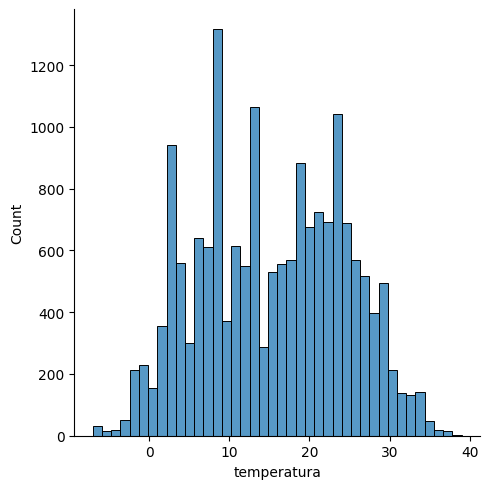

In [113]:
sns.displot(numeric_data.temperatura)

<Axes: xlabel='temperatura', ylabel='Count'>

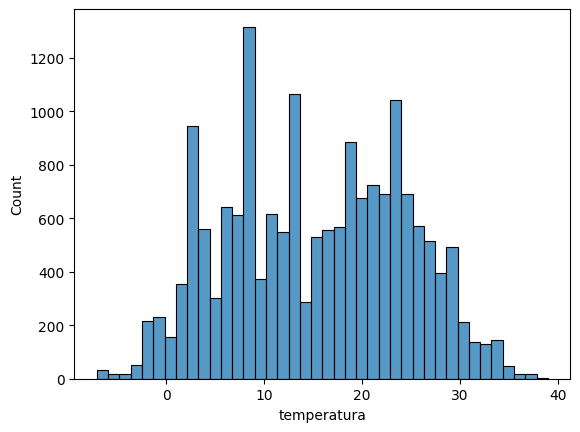

In [114]:
sns.histplot(numeric_data.temperatura)

In [115]:
cuenta = pd.Series(numeric_data.temperatura).value_counts()

porcentaje = cuenta / cuenta.sum() *100
serie = pd.concat([cuenta,porcentaje],axis = 1 , keys=['Q Valores','%'])
serie

# Javier: por que la cuenta de valores no me da lo mismo que el grafico de arriba?   Segun la tabla, 21.14 tiene mas repeticiones, pero segun el grafico hay un valor
# cercano a 10 

,Q Valores,%
21.14,726,4.177456
23.02,693,3.987571
22.08,692,3.981817
24.90,690,3.970309
20.20,675,3.883998
8.92,671,3.860982
7.98,645,3.711376
6.10,641,3.688360
10.80,614,3.533000
7.04,611,3.515737


In [116]:
skew(numeric_data.temperatura),kurtosis (numeric_data.temperatura, fisher = False)

(-0.006020363666956041, 2.0580815216274786)

In [117]:
# la kurtosis esta dentro del limite pero el skew no.

# voy por el metodo del boxplot



# fe de erratas: ambos parametros estan correctos......dejo el boxplot (que fallo y aplico z_score al final)

<Axes: >

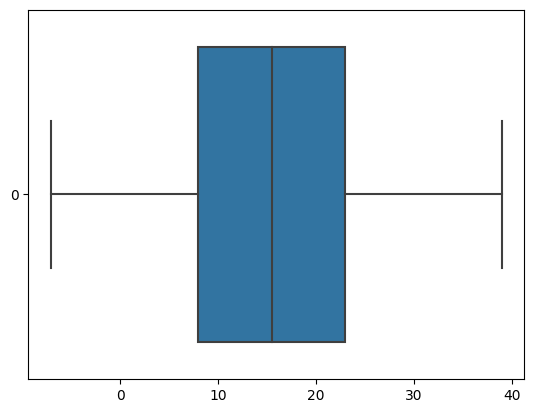

In [118]:
sns.boxplot(numeric_data['temperatura'],orient = 'h')

In [119]:
# no se ven outliers......

In [120]:
numeric_data.temperatura.describe()

count    17379.000000
mean        15.358397
std          9.050138
min         -7.060000
25%          7.980000
50%         15.500000
75%         23.020000
max         39.000000
Name: temperatura, dtype: float64

In [121]:
Q1 = numeric_data.temperatura.quantile(.25)
Q1

7.98

In [122]:
Q3 = numeric_data.temperatura.quantile(.75)
Q3

23.020000000000003

In [123]:
IQR = Q3-Q1
IQR

15.040000000000003

In [124]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [125]:
limite_inferior, limite_superior

(-14.580000000000002, 45.580000000000005)

el limite inferior es menor al minimo y el limite superior es mayor al maximo.....no tengo outliers

In [126]:
# si lo quisiera filtrar (no es el caso pero hago la prueba).....ademas, el limite inferior deberia ser el minimio y el superior el maximo porque ambos exceden
columnaiqr = numeric_data["temperatura"][(numeric_data["temperatura"] >= limite_inferior) &(numeric_data["temperatura"] < limite_superior)]

In [127]:
columnaiqr.describe()

count    17379.000000
mean        15.358397
std          9.050138
min         -7.060000
25%          7.980000
50%         15.500000
75%         23.020000
max         39.000000
Name: temperatura, dtype: float64

In [128]:
numeric_data.temperatura.describe()

count    17379.000000
mean        15.358397
std          9.050138
min         -7.060000
25%          7.980000
50%         15.500000
75%         23.020000
max         39.000000
Name: temperatura, dtype: float64

ahora si, lo hago por z_score

In [129]:
z_score = np.abs(stats.zscore(numeric_data['temperatura']))
columna_z_score_temperatura = numeric_data['temperatura'][z_score <2] #limite
columna_z_score_temperatura.describe()

count    17088.000000
mean        15.294650
std          8.751379
min         -2.360000
25%          7.980000
50%         15.500000
75%         22.080000
max         33.360000
Name: temperatura, dtype: float64

In [130]:
limite_inferior_temperatura = columna_z_score_temperatura.min()
limite_superior_temperatura = columna_z_score_temperatura.max()
limite_inferior_temperatura , limite_superior_temperatura

(-2.3600000000000003, 33.36)

aplicando z_score, ahora el limite inferior esta mas cerca de los 0 grados y la maxima a los 31 

## Viento

In [131]:
numeric_data.viento.describe()

count    17379.000000
mean        12.736540
std          8.196795
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: viento, dtype: float64

la velociad promedio del viento en washintong es de 10 kilometros por hora (relativamente cerca al promedio del dataset). Como ya vimos anteriormente, hay momentos del año en donde hubo tornados. Eso infiere en el maximo y el promedio de los datos del viento

In [132]:
v = numeric_data.viento
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
0.0000,2180,12.543875,12.543875
8.9981,1738,10.000575,22.544450
11.0014,1695,9.753150,32.297601
12.9980,1657,9.534496,41.832096


In [133]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                4
Porcentaje              4
Porcentaje acumulado    4
dtype: int64

In [134]:
tabla.count()

Cantidad                30
Porcentaje              30
Porcentaje acumulado    30
dtype: int64

La variable Viento tiene 30 valores unicos. 43 de esos valores representan la mitad de los valores mas frecuentes, siendo 0 el valor que mas veces se repite.

<Axes: xlabel='Cantidad'>

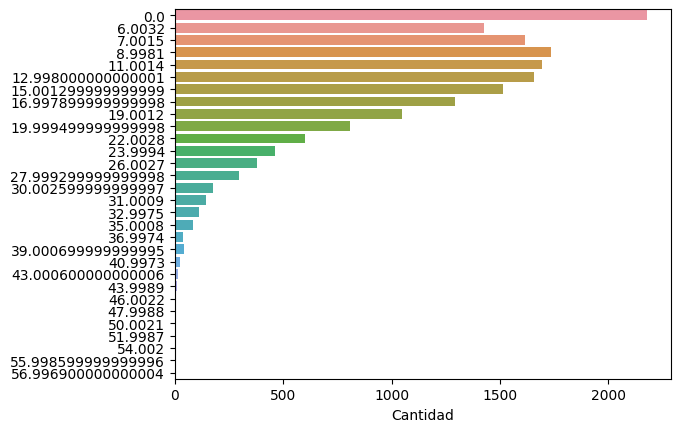

In [135]:
sns.barplot(y= tabla.index,x=tabla['Cantidad'],orient = 'h')

en el analisis inicial se veia que crecia el alquiler de bicicletas cuando crecia el viento y luego, bajaba el alquiler a mas viento (lo que seria logico)
esto es producto a que hay una mayor concentración de registros de viento con valores entre 0 a 15

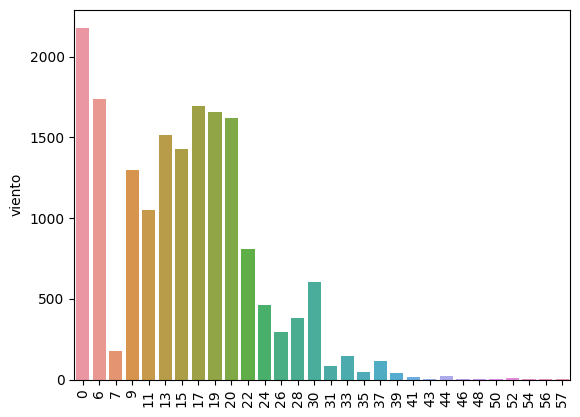

In [136]:
prueba = round(numeric_data.viento,0).astype(int)
sns.barplot(x= prueba.unique(),y=prueba.value_counts())
plt.xticks(rotation=90)
plt.show()

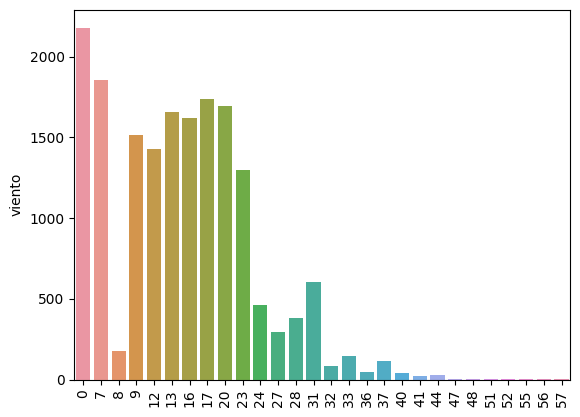

In [137]:
import math
prueba2 = numeric_data.viento
prueba2 = prueba2.apply(lambda x: math.ceil(x))
sns.barplot(x= prueba2.unique(),y=prueba2.value_counts())
plt.xticks(rotation=90)
plt.show()

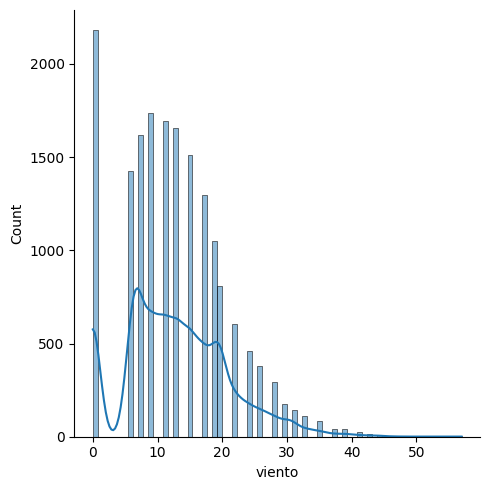

In [138]:
sns.displot(numeric_data.viento,kde = True)


In [139]:
cuenta = pd.Series(numeric_data.temperatura).value_counts()
porcentaje = cuenta / cuenta.sum() *100
serie = pd.concat([cuenta,porcentaje],axis = 1 , keys=['Q Valores','%'])
serie

,Q Valores,%
21.14,726,4.177456
23.02,693,3.987571
22.08,692,3.981817
24.90,690,3.970309
20.20,675,3.883998
8.92,671,3.860982
7.98,645,3.711376
6.10,641,3.688360
10.80,614,3.533000
7.04,611,3.515737


In [140]:
skew(numeric_data.viento),kurtosis(numeric_data.viento,fisher = False)

(0.5748555816221628, 3.5903052189041817)

el limite del skew esta por encima......voy a proceder con el metodo boxplot. 

Igualmente, a simple vista no se ve una curva y hay valores con viento = 0 que parecen ser outliers

<Axes: >

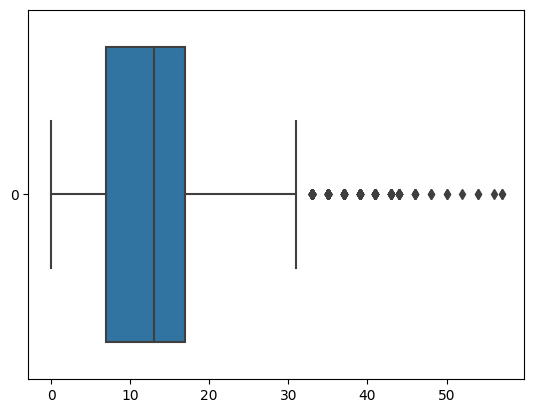

In [141]:
sns.boxplot(numeric_data.viento, orient = 'h')

segun el boxplot, el cero no era el outlier sino los valores por encima de 30 (suena logico sabiendo que el promedio de una ciudad es de 10 kmh)

In [142]:
numeric_data.viento.describe()

count    17379.000000
mean        12.736540
std          8.196795
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: viento, dtype: float64

In [143]:
Q1 = numeric_data.viento.quantile(.25)
Q1


7.0015

In [144]:
Q3 = numeric_data.viento.quantile(.75)
Q3

16.997899999999998

In [145]:
IQR = Q3-Q1
IQR

9.996399999999998

In [146]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [147]:
limite_inferior,limite_superior

(-7.9930999999999965, 31.992499999999993)

In [148]:
limite_minimo_viento = numeric_data.viento.min()
limite_maximo_viento = limite_superior
limite_minimo_viento, limite_maximo_viento

(0.0, 31.992499999999993)

**aun me suena raro la cantidad de viento == 0 y el salto que hay casi hasta el 6 sin valores**


In [149]:
np.sort(numeric_data.viento.unique())

array([ 0.    ,  6.0032,  7.0015,  8.9981, 11.0014, 12.998 , 15.0013,
       16.9979, 19.0012, 19.9995, 22.0028, 23.9994, 26.0027, 27.9993,
       30.0026, 31.0009, 32.9975, 35.0008, 36.9974, 39.0007, 40.9973,
       43.0006, 43.9989, 46.0022, 47.9988, 50.0021, 51.9987, 54.002 ,
       55.9986, 56.9969])

In [150]:
prueba = pd.Series (np.sort(numeric_data.viento.unique()))
prueba.diff()

0        NaN
1     6.0032
2     0.9983
3     1.9966
4     2.0033
5     1.9966
6     2.0033
7     1.9966
8     2.0033
9     0.9983
10    2.0033
11    1.9966
12    2.0033
13    1.9966
14    2.0033
15    0.9983
16    1.9966
17    2.0033
18    1.9966
19    2.0033
20    1.9966
21    2.0033
22    0.9983
23    2.0033
24    1.9966
25    2.0033
26    1.9966
27    2.0033
28    1.9966
29    0.9983
dtype: float64

In [151]:
df.viento.value_counts(normalize=True).sort_values(ascending = False)*100

0.0000     12.543875
8.9981     10.000575
11.0014     9.753150
12.9980     9.534496
7.0015      9.304333
15.0013     8.705909
6.0032      8.199551
16.9979     7.451522
19.0012     6.030266
19.9995     4.649289
22.0028     3.463951
23.9994     2.646873
26.0027     2.192301
27.9993     1.703205
30.0026     1.012716
31.0009     0.840094
32.9975     0.644456
35.0008     0.483342
39.0007     0.253179
36.9974     0.224409
40.9973     0.132344
43.0006     0.080557
43.9989     0.063295
46.0022     0.028770
50.0021     0.011508
54.0020     0.011508
56.9969     0.011508
47.9988     0.011508
51.9987     0.005754
55.9986     0.005754
Name: viento, dtype: float64

de 0 salta a 6.... despues los saltos entre las mediciones son mucho menores pero....


dilema: Si elimino el viento = cero saco un 12% de los datos..... Voy a optar por reemplazarlo por la media

In [152]:
df_copia['viento'] = df_copia['viento'].replace(0,df_copia['viento'].mean())

In [153]:

df_copia['viento'].describe() #comprobacion del cambio

count    17379.000000
mean        14.334195
std          6.654700
min          6.003200
25%          8.998100
50%         12.998000
75%         16.997900
max         56.996900
Name: viento, dtype: float64

In [154]:
numeric_data['viento'].describe() # dato original

count    17379.000000
mean        12.736540
std          8.196795
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: viento, dtype: float64

entiendo que la media suba, porque reemplace el extremo inferior por la media, pero ¿por que la desviación estandar se aleja de la media?

In [155]:
numeric_data['viento'].mean()-numeric_data['viento'].std() #original

4.539744308155976

In [156]:
df_copia['viento'].mean() - df_copia['viento'].std() #dato reemplazado

7.679495467318057

## Sensación termica

In [157]:
numeric_data.st.describe()

count    17379.000000
mean        15.401157
std         11.342114
min        -16.000000
25%          5.997800
50%         15.996800
75%         24.999200
max         50.000000
Name: st, dtype: float64

la sensacion termica tiene valores mas extremos que la temperatura (-7 a 39)

la desviacion estantar esta cercana a la media

In [158]:
v = numeric_data.st
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
24.9992,988,5.685022,5.685022
18.0032,618,3.556016,9.241038
11.0006,614,3.533000,12.774038
5.9978,600,3.452443,16.226480
28.0022,593,3.412164,19.638644
24.0026,588,3.383394,23.022038
18.9998,579,3.331607,26.353645
17.0000,575,3.308591,29.662236
13.9970,559,3.216526,32.878762
3.9980,549,3.158985,36.037747


In [159]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                14
Porcentaje              14
Porcentaje acumulado    14
dtype: int64

In [160]:
tabla.count()

Cantidad                65
Porcentaje              65
Porcentaje acumulado    65
dtype: int64

La variable ST tiene 65 valores unicos. 14 de esos valores representan la mitad de los valores mas frecuentes, siendo 24.99 el valor que mas veces se repite.

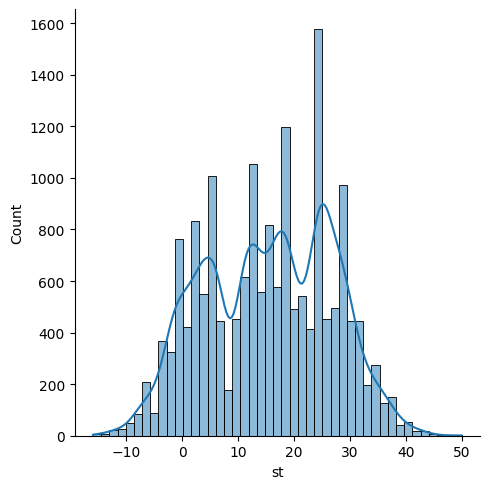

In [161]:
sns.displot(numeric_data.st, kde = True)


In [162]:
skew(numeric_data.st),kurtosis(numeric_data.st, fisher = False)

(-0.09042105336080757, 2.154486089179509)

<Axes: >

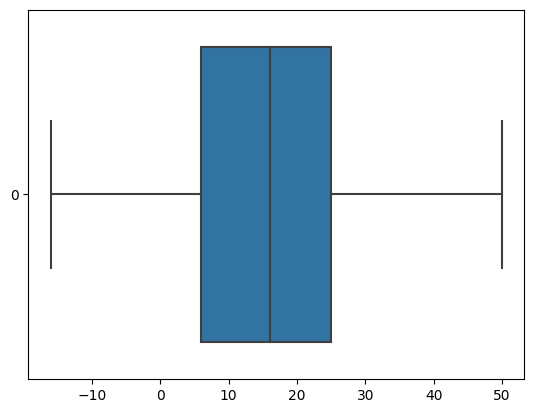

In [163]:
#voy por boxplot


# OTRA VEZ LA FE DE ERRATAS....AL FINAL LO HAGO POR Z_SCORE

sns.boxplot(numeric_data.st,orient = 'h')

In [164]:
#no se ven outliers
numeric_data.st.describe()

count    17379.000000
mean        15.401157
std         11.342114
min        -16.000000
25%          5.997800
50%         15.996800
75%         24.999200
max         50.000000
Name: st, dtype: float64

In [165]:
Q1 = numeric_data.st.quantile(.25)
Q3 = numeric_data.st.quantile(.75)
Q1,Q3

(5.997799999999998, 24.999200000000002)

In [166]:
IQR = Q3-Q1
limite_inferior = Q1- 1.5 * IQR
limite_superior = Q3 + 1.5* IQR

In [167]:
limite_inferior,limite_superior

(-22.504300000000008, 53.50130000000001)

In [168]:
#ambos limites estan por afuera de los maximos. No hay outliers

POR Z_SCORE

In [169]:
z_score = np.abs(stats.zscore(numeric_data['st']))
columna_z_score_st = numeric_data['st'][z_score <2] #limite
columna_z_score_st.describe()

count    17039.000000
mean        15.482407
std         10.878163
min         -6.997600
25%          5.997800
50%         15.996800
75%         24.999200
max         38.001200
Name: st, dtype: float64

In [170]:
limite_inferior_st = columna_z_score_st.min()
limite_superior_st = columna_z_score_st.max()
limite_inferior_st,limite_superior_st

(-6.9976, 38.001200000000004)

los limites del z_score son mas razonables que los originales

## Alquileres

In [171]:
numeric_data.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

la desviación estandar esta cerca de la media, pero el valor maximo esta muy alejado de la media

In [172]:
v = numeric_data.cnt
serie_valores = pd.Series(data = v )
cantidad_valores= serie_valores.value_counts()
porcentaje_valores = cantidad_valores / len(v)*100
porcentaje_acumulado = porcentaje_valores.cumsum()
tabla = pd.DataFrame({'Cantidad': cantidad_valores,'Porcentaje': porcentaje_valores,'Porcentaje acumulado': porcentaje_acumulado})
tabla[tabla['Porcentaje acumulado']<50]

,Cantidad,Porcentaje,Porcentaje acumulado
5,260,1.496058,1.496058
6,236,1.357961,2.854019
4,231,1.329190,4.183210
3,224,1.288912,5.472122
2,208,1.196847,6.668968
...,...,...,...
76,39,0.224409,49.093734
177,39,0.224409,49.318143
163,39,0.224409,49.542551
110,39,0.224409,49.766960


In [173]:
tabla[tabla['Porcentaje acumulado']<50].count()

Cantidad                136
Porcentaje              136
Porcentaje acumulado    136
dtype: int64

In [174]:
tabla.count()

Cantidad                869
Porcentaje              869
Porcentaje acumulado    869
dtype: int64

La variable cnt tiene 869 valores unicos. 136 de esos valores representan la mitad de los valores mas frecuentes, siendo 5 el valor que mas veces se repite.


In [175]:
valores_2011  = df['cnt'][df['yr'] == "año 2011"]
valores_2012  = df['cnt'][df['yr'] == "año 2012"]


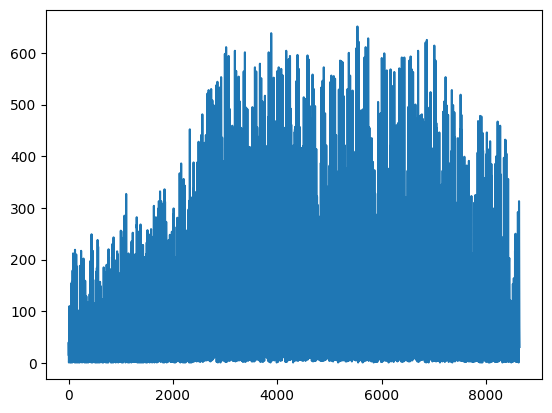

In [176]:
plt.plot(valores_2011)

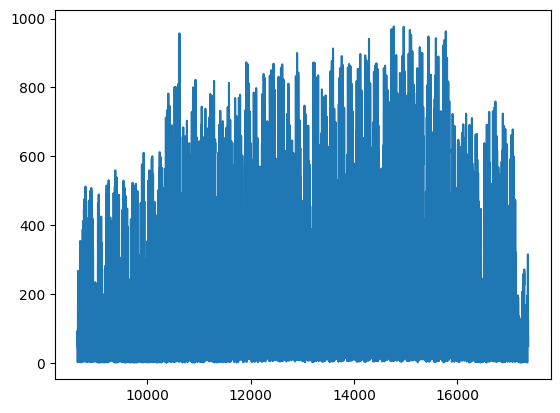

In [177]:
plt.plot(valores_2012)

In [178]:
df.groupby('yr')['cnt'].sum()

yr
año 2011    1243103
año 2012    2049576
Name: cnt, dtype: int64

<BarContainer object of 17379 artists>

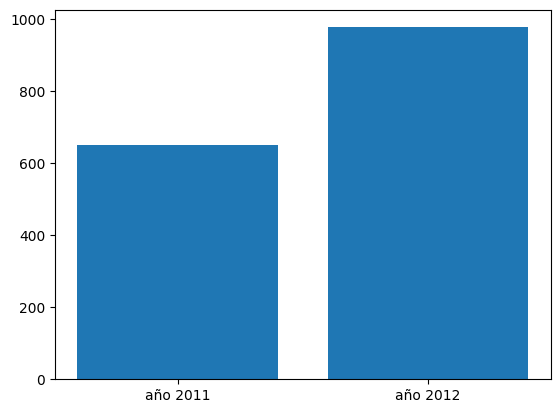

In [179]:
plt.bar(df.yr,df.cnt)


en los analisis cuando arranque el curso hice la prueba si los alquileres diferian año a año.....en ese momento vi que no habian diferencias sustanciales.

algo hice mal en ese momento porque el año 2012 es mayor al 2011


este analisis surge en este momento porque queria ver como estaban distribuidos los maximos y minimos. 

Ambos años arrancan y termina con los valores bajos. Los datos del medio son los mejores momentos de alquiler

<BarContainer object of 8645 artists>

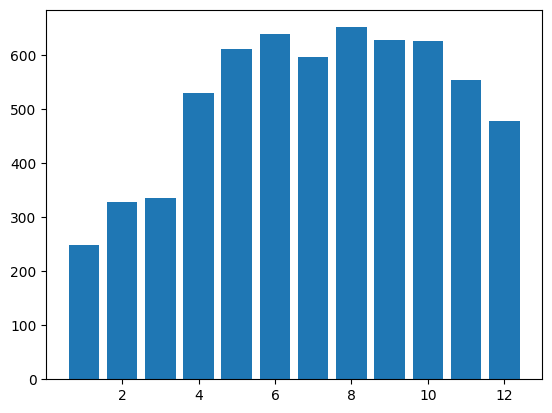

In [180]:
año1 = df[df['yr'] == "año 2011"]
año2 = df[df['yr'] == "año 2012"]
plt.bar(año1.mnth,año1.cnt)

<BarContainer object of 8734 artists>

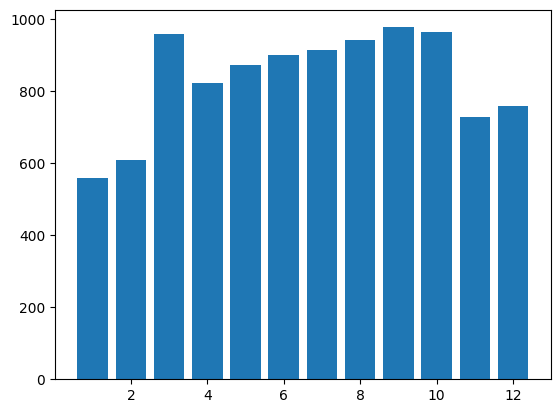

In [181]:
plt.bar(año2.mnth,año2.cnt)

In [182]:
pd.pivot_table(df,values = 'cnt',index = 'mnth',columns='yr')

yr,año 2011,año 2012
mnth,,
1,55.507267,130.558704
2,74.291217,149.041908
3,87.732877,221.904441
4,131.947149,242.651811
5,182.555108,263.259409
6,199.322222,281.708333
7,189.974462,273.665323
8,186.991792,288.310484
9,177.709902,303.573611


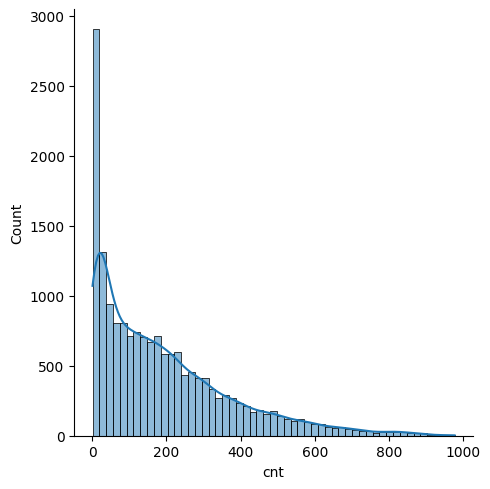

In [183]:
sns.displot(numeric_data.cnt,kde = True)

In [184]:
skew(numeric_data.cnt),kurtosis(numeric_data.cnt, fisher = False)

(1.2773013463494975, 4.416450354688742)

<Axes: >

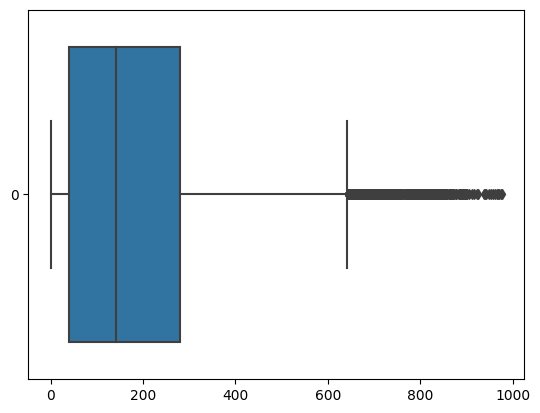

In [185]:
sns.boxplot(numeric_data.cnt,orient='h')

In [186]:
numeric_data.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [187]:
Q1 = numeric_data.cnt.quantile (0.25)
Q3 = numeric_data.cnt.quantile (0.75)
Q1,Q3


(40.0, 281.0)

In [188]:
IQR = Q3 -Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
limite_inferior,limite_superior

(-321.5, 642.5)

In [189]:
limite_inferior_cantidad = numeric_data.cnt.min()
limite_superior_cantidad = limite_superior

In [190]:
limite_inferior_cantidad,limite_superior_cantidad

(1, 642.5)

In [191]:
# que raro el pico de 977....
df[df.cnt == 977]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura,st,viento
14773,2012-09-12,verano,año 2012,9,18,no,3,si,excelente,0.66,...,0.44,0.2537,91,886,977,Mayor a 300,mie,23.02,24.9992,16.9979


si bien hay valores muy altos respecto a la media, los picos parecen estar acordes a la epoca del año. Voy a optar por no eliminar outliers de la variable objetivo

# Dataframe Final

In [192]:
# nunca habia hecho la prueba si los alquileres casuales + los resgistrados son iguales al total
df.casual.sum() + df.registered.sum() - df.cnt.sum()


## si, si lo son


#No vale la pena ver casual y resitrados si tienen ouliers ya que he comprobado que la suma = cnt

0

In [193]:
numeric_data.describe()

,hum,casual,registered,cnt,temperatura,st,viento
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.627229,35.676218,153.786869,189.463088,15.358397,15.401157,12.736540
std,0.192930,49.305030,151.357286,181.387599,9.050138,11.342114,8.196795
min,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000,0.000000
25%,0.480000,4.000000,34.000000,40.000000,7.980000,5.997800,7.001500
50%,0.630000,17.000000,115.000000,142.000000,15.500000,15.996800,12.998000
75%,0.780000,48.000000,220.000000,281.000000,23.020000,24.999200,16.997900
max,1.000000,367.000000,886.000000,977.000000,39.000000,50.000000,56.996900


<Axes: >

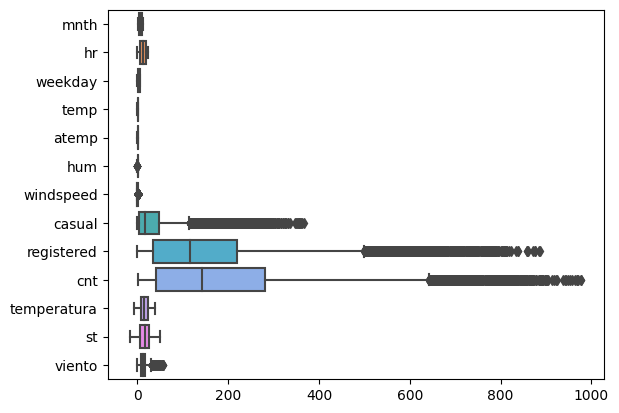

In [194]:
#ultima vista al dataset original
sns.boxplot(df,orient = 'h')

In [195]:
limite_minimo_humedad,limite_maximo_humedad

(0.25, 1.0)

In [196]:
df_copia.shape

(17379, 21)

In [197]:
df_copia = df_copia[(df_copia.hum >=limite_minimo_humedad) & (df_copia.hum <limite_maximo_humedad) ]
df_copia.shape

(16859, 21)

In [198]:
17379-16859

520

In [199]:
limite_minimo_viento, limite_maximo_viento #en los pasos anteriors, en df_copia reemplace los 0 por la media

(0.0, 31.992499999999993)

In [200]:
df_copia = df_copia[(df_copia.viento >=limite_minimo_viento) & (df_copia.viento <limite_maximo_viento) ]
df_copia.shape

(16545, 21)

In [201]:
16859 - 16545

314

In [202]:
limite_inferior_cantidad,limite_superior_cantidad 

(1, 642.5)

NO VOY A LIMITAR ESTOS DATOS

In [203]:
# df = df[(df.cnt >=limite_inferior_cantidad) & (df.cnt <limite_superior_cantidad) ]

In [204]:
limite_inferior_temperatura,limite_superior_temperatura


(-2.3600000000000003, 33.36)

In [205]:
df_copia= df_copia[(df_copia.temperatura >=limite_inferior_temperatura) & (df_copia.temperatura <limite_superior_temperatura) ]
df_copia.shape

(16216, 21)

In [206]:
16545  - 16216 #en este paso antes habia en error en el limite....probablemente esto hizo caer los registros mas de lo deseado

329

In [207]:
limite_inferior_st,limite_superior_st

(-6.9976, 38.001200000000004)

In [208]:
df_copia= df_copia[(df_copia.st >=limite_inferior_st) & (df_copia.st <limite_superior_st) ]
df_copia.shape

(16078, 21)

In [209]:
16216 - 16078


138

In [210]:
17379 - 16216 # total registros eliminados

1163

<Axes: >

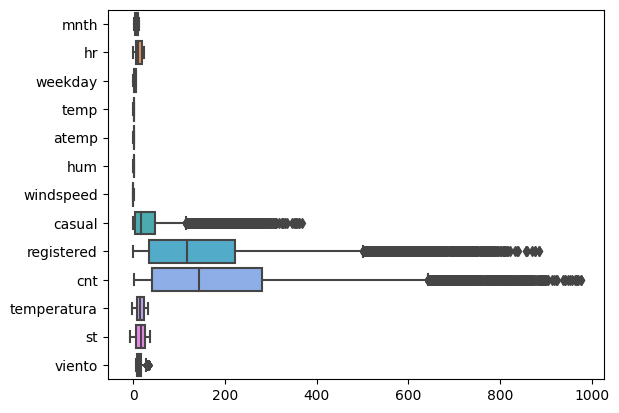

In [211]:
# y ahora quedo asi:
sns.boxplot(df_copia,orient = 'h')

las variables objetivos tienen outliers porque no hice las eliminaciones, pero no me parece correcto eliminar este dato

REPAZO ALGUNOS GRAFICOS QUE TENIAN COMPORTAMIENTO EXTRAÑO

Text(0.5, 0, 'Viento')

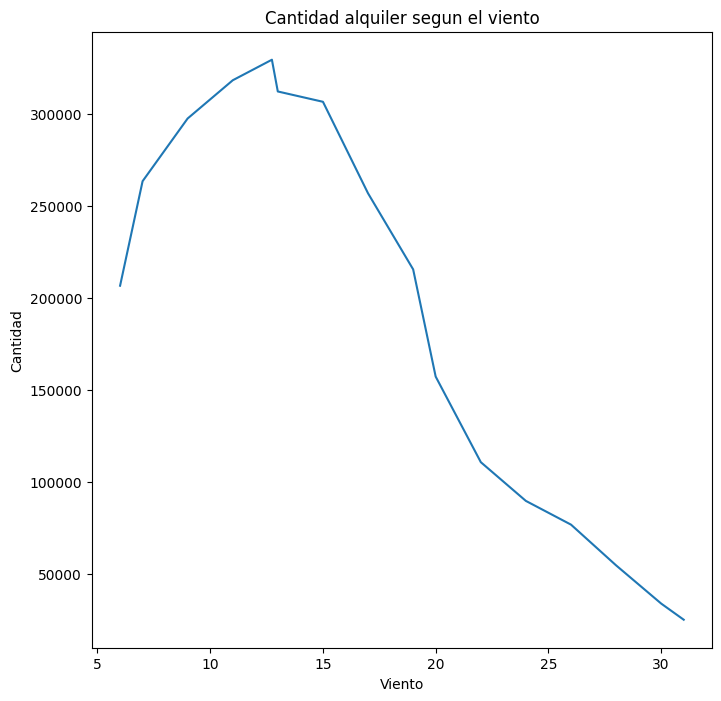

In [212]:
datos= df_copia.groupby("viento")[["cnt"]].sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(datos.index,datos["cnt"])
ax.set_title ("Cantidad alquiler segun el viento")
ax.set_ylabel("Cantidad")
ax.set_xlabel ("Viento")

aun no me gusta el crecimiento inicial de la curva....lo logico es, a mas viento menos alquiler

Text(0, 0.5, 'Cantidad')

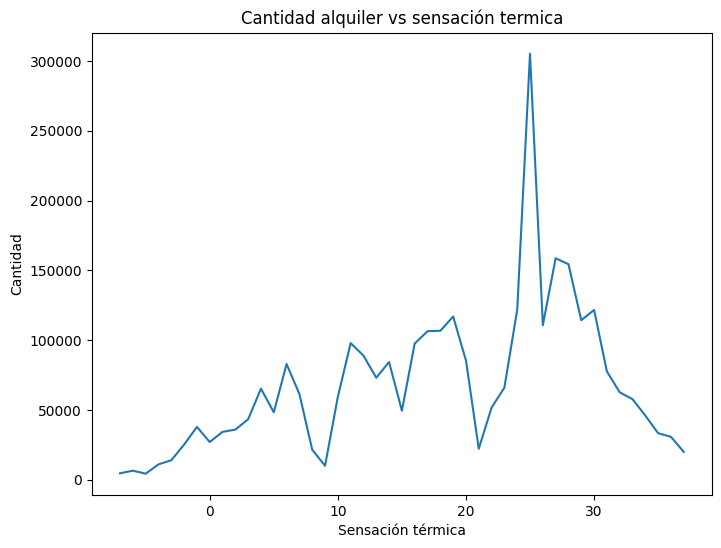

In [213]:
datos= df_copia.groupby("st")[["cnt"]].sum()
fig, ax = plt.subplots(figsize = (8,6))
ax.plot (datos.index,datos["cnt"])
ax.set_title("Cantidad alquiler vs sensación termica")
ax.set_xlabel("Sensación térmica")
ax.set_ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

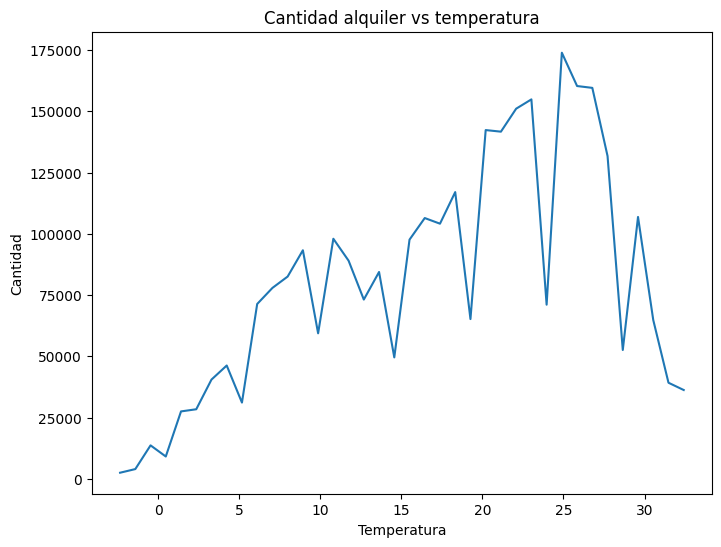

In [214]:
# Igual pero con temperatura
datos= df_copia.groupby("temperatura")[["cnt"]].sum()
fig, ax = plt.subplots(figsize = (8,6))
ax.plot (datos.index,datos["cnt"])
ax.set_title("Cantidad alquiler vs temperatura")
ax.set_xlabel("Temperatura")
ax.set_ylabel("Cantidad")

Text(0.5, 0, 'Humedad')

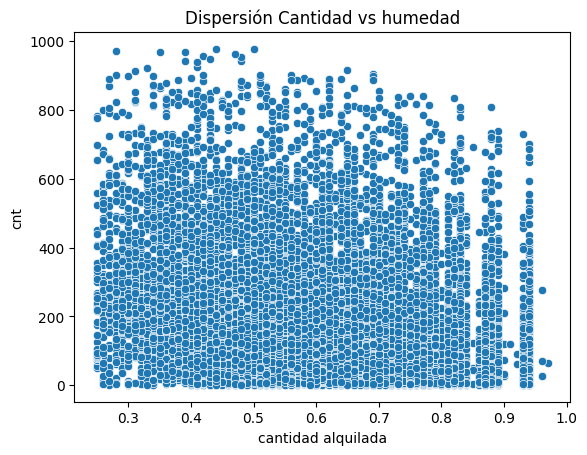

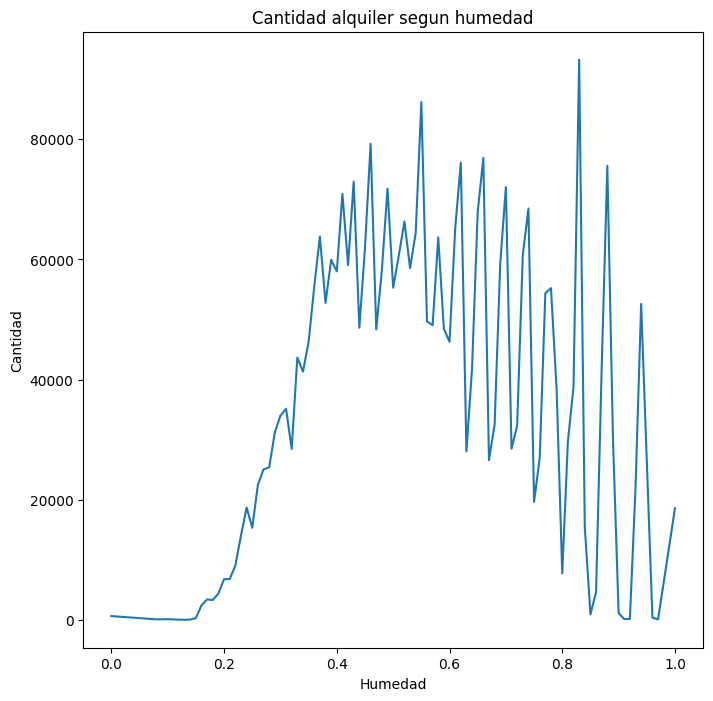

In [215]:
sns.scatterplot(data= df_copia,x="hum",y="cnt").set(title = "Dispersión Cantidad vs humedad",xlabel="cantidad alquilada")
datos= df.groupby("hum")[["cnt"]].sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(datos.index,datos["cnt"])
ax.set_title ("Cantidad alquiler segun humedad")
ax.set_ylabel("Cantidad")
ax.set_xlabel ("Humedad")

<function matplotlib.pyplot.show(close=None, block=None)>

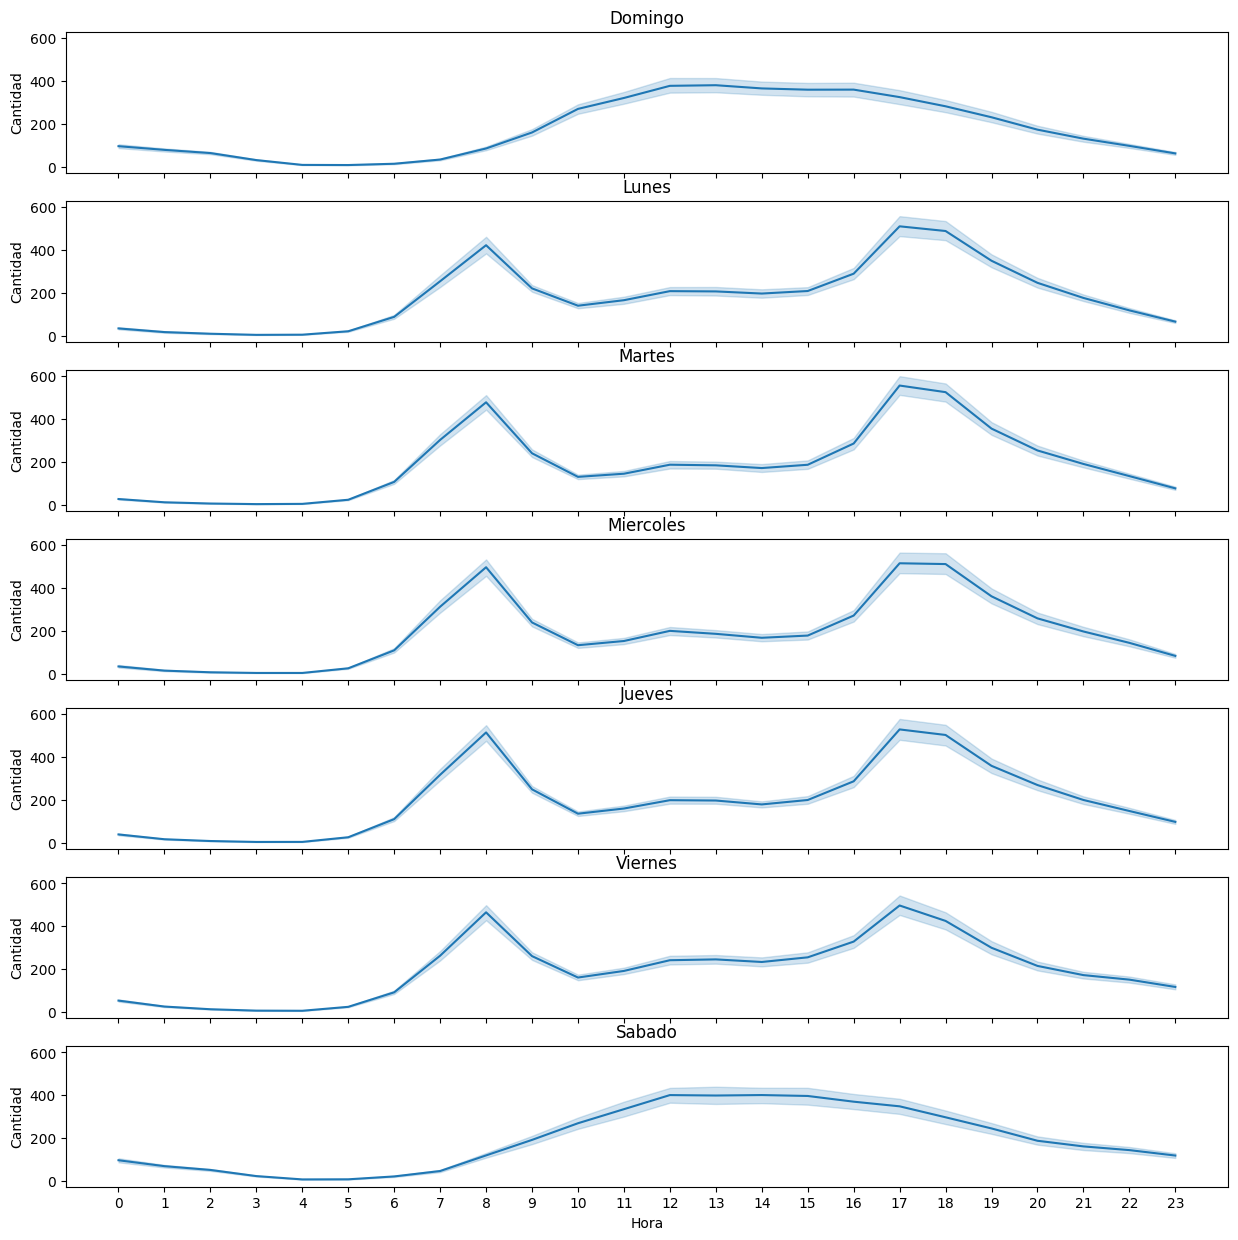

In [216]:
fig, axes = plt.subplots(7, 1, figsize=(15, 15), sharey=True,sharex=True)
sns.lineplot(ax= axes[0], data = df_copia[df_copia["weekday"]==0], y="cnt",x="hr").set(title = "Domingo",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[1], data = df_copia[df_copia["weekday"]==1], y="cnt",x="hr").set(title = "Lunes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[2], data = df_copia[df_copia["weekday"]==2], y="cnt",x="hr").set(title = "Martes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[3], data = df_copia[df_copia["weekday"]==3], y="cnt",x="hr").set(title = "Miercoles",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[4], data = df_copia[df_copia["weekday"]==4], y="cnt",x="hr").set(title = "Jueves",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[5], data = df_copia[df_copia["weekday"]==5], y="cnt",x="hr").set(title = "Viernes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[6], data = df_copia[df_copia["weekday"]==6], y="cnt",x="hr").set(title = "Sabado",xlabel="Hora",ylabel="Cantidad")

#ax[0].grid(axis='both')
#ax[1].grid(axis='both')

plt.xticks(range(0,24,1))

plt.show

las curvas se mantienen como las origianales....la eliminación de registros no altero la escencia 

# Conclusiones sobre los datos

como se ha visto a lo largo del analisis, las cantidades varian: 

* segun el año: el primer año año es menor
* segun los meses / estación de año: invierno tiene las menores cantidades, sube hasta el verano y en otoño empieza a descender
* respecto al clima general: a mal tiempo, bajos alquiler
* respecto al viento: a mas viento, menos alquiler
* respecto a la temperatura / sensación termica: hay temperaturas optimas (agradables) para alquilar. A bajas o altas temperaturas decae


Existe una correlacion fuerte entre la temperatura y la sención termica


En base se puede deducir:

1) el mejor momento para retirar bicicletas para reparacion es la epoca invernal 

2) por contrario, la mayor demanda de bicicletas es en verano

3) en opocas de temperaturas extremas (tornados / tormentas de nieve), no hay alquileres

4) Los dias de semana hay que reforzar las horas picos 

5) Los fin de semana el horario del mediodia a tarde son la mayor demanda
